In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy.visualization import simple_norm
from astropy.visualization import ZScaleInterval
from scipy.ndimage import gaussian_filter
from astropy.stats import mad_std
from astropy.stats import sigma_clipped_stats
from photutils.aperture import CircularAperture
from photutils.aperture import SkyCircularAperture
from photutils.aperture import aperture_photometry
import os
from astropy.table import Table
from make_cuts import choosef, random_apers, get_names, radec_minmax, cuts

#from astroML.plotting import MultiAxes
from scipy.optimize import curve_fit

In [2]:
data_a= Table.read("cat_gazpar_match.fits")

In [3]:
data_a

NUMBER_1,FLUX_ISO_1,FLUXERR_ISO_1,MAG_ISO_1,MAGERR_ISO_1,FLUX_APER_1 [13],FLUXERR_APER_1 [13],MAGERR_APER_1 [13],MAG_APER_1 [13],FLUX_AUTO_1,FLUXERR_AUTO_1,MAG_AUTO_1,MAGERR_AUTO_1,BACKGROUND_1,ALPHAPEAK_J2000_1,DELTAPEAK_J2000_1,X_IMAGE_1,Y_IMAGE_1,ALPHA_J2000_1,DELTA_J2000_1,FLAGS_1,ELONGATION_1,ELLIPTICITY_1,CLASS_STAR_1,FLUX_RADIUS_1,SNR_WIN_1,MAG_APER_g_1 [13],FLUX_APER_g_1 [13],FLUXERR_APER_g_1 [13],MAGERR_APER_g_1 [13],MAGERR_AUTO_g_1,BACKGROUND_g_1,MAG_AUTO_g_1,MAG_APER_r_1 [13],FLUX_APER_r_1 [13],FLUXERR_APER_r_1 [13],MAGERR_APER_r_1 [13],MAGERR_AUTO_r_1,BACKGROUND_r_1,MAG_AUTO_r_1,MAG_APER_i_1 [13],FLUX_APER_i_1 [13],FLUXERR_APER_i_1 [13],MAGERR_APER_i_1 [13],MAGERR_AUTO_i_1,BACKGROUND_i_1,MAG_AUTO_i_1,MAG_APER_z_1 [13],FLUX_APER_z_1 [13],FLUXERR_APER_z_1 [13],MAGERR_APER_z_1 [13],MAGERR_AUTO_z_1,BACKGROUND_z_1,MAG_AUTO_z_1,MAG_APER_y_1 [13],FLUX_APER_y_1 [13],FLUXERR_APER_y_1 [13],MAGERR_APER_y_1 [13],MAGERR_AUTO_y_1,BACKGROUND_y_1,MAG_AUTO_y_1,IDENT,Z_ML,Z_ML68_LOW,Z_ML68_HIGH,Z_BEST,Z_BEST68_LOW,Z_BEST68_HIGH,CHI_BEST,MOD_BEST,EXTLAW_BEST,EBV_BEST,SCALE_BEST,NBAND_USED,Z_SEC,CHI_SEC,MOD_SEC,Z_QSO,CHI_QSO,MOD_QSO,MOD_STAR,CHI_STAR,CONTEXT,ZSPEC,MAG_OBS0,MAG_OBS1,MAG_OBS2,MAG_OBS3,MAG_OBS4,ERR_MAG_OBS0,ERR_MAG_OBS1,ERR_MAG_OBS2,ERR_MAG_OBS3,ERR_MAG_OBS4,MAG_MOD0,MAG_MOD1,MAG_MOD2,MAG_MOD3,MAG_MOD4,MAG_ABS0,MAG_ABS1,MAG_ABS2,MAG_ABS3,MAG_ABS04,MABS_FILT0,MABS_FILT1,MABS_FILT2,MABS_FILT3,MABS_FILT4,STRING_INPUT
int32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,float64,float32,float32,float64,float64,float32,float32,float64,float64,int16,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64,int32,float64,float64,float64,float32,float32,float32,float32,int16,int16,float32,float32,int16,float32,float32,int16,float32,float32,int16,int16,float32,int16,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,int16,int16,int16,int16,int16,int16
4034,27.845892,1.8776053,23.388098,0.073227294,8.3005085 .. 17.92506,0.8128805 .. 5.4786286,0.106353514 .. 0.3319258,24.71541465317894 .. 23.87952483689476,16.354916,5.9053755,23.979056010600814,0.39212906,0.09549639,318.0187646109669,-67.00743734197788,10758.22,2730.374,318.0189132597405,-67.00740835798325,0,1.3636,0.2666471,0.43226537,1.4077643,15.40784,26.70902438290174 .. 24.653760863614632,1.3253391 .. 8.798979,0.2602904 .. 1.7128357,0.21328533 .. 0.21140404,0.23126997,-0.007153783,24.66991992123182,26.386988413920857 .. 25.21419216453121,1.6380414 .. 4.8244023,0.23520635 .. 1.5803453,0.15593873 .. 0.3557446,0.60089195,0.014271318,25.701834452739217,26.307866295764565 .. 24.88118668455851,1.8275414 .. 6.8004813,0.1685536 .. 1.1250113,0.100161456 .. 0.17965822,0.23524338,0.0070617376,25.09233399290812,25.753492543022894 .. 24.287834355156683,2.9645553 .. 11.434646,0.24329033 .. 1.6094496,0.08912409 .. 0.15285671,0.1643992,0.054461643,24.285551258843206,25.34041110508374 .. 22.924881853985106,4.572242 .. 42.300083,0.7408307 .. 4.9163165,0.17596228 .. 0.12622008,0.120100416,0.29706973,22.789980807232176,4034,1.5107,1.4042,1.5974,1.557,1.4313,1.6109,3.46798,27,1,0.25,4671.69,5,0.48,7.52369,31,1.72,1.72842,1,89,27.9277,0,-99.0,23.084,22.886,22.768,22.301,21.685,0.176,0.134,0.085,0.08,0.138,23.159,22.938,22.704,22.289,21.82,-22.99305,-23.39869,-23.49398,-23.66664,-23.72453,4,4,4,4,4,0
4126,19.115555,1.5626724,23.796534,0.08877912,5.2767973 .. 22.774446,0.7852747 .. 5.173896,0.16161476 .. 0.24671735,25.207251201030502 .. 23.61955703293968,24.196423,3.7108276,23.553799281474838,0.16655184,-0.031794023,317.65957181547225,-67.0081010511459,12629.496,2745.4124,317.6596696760718,-67.008

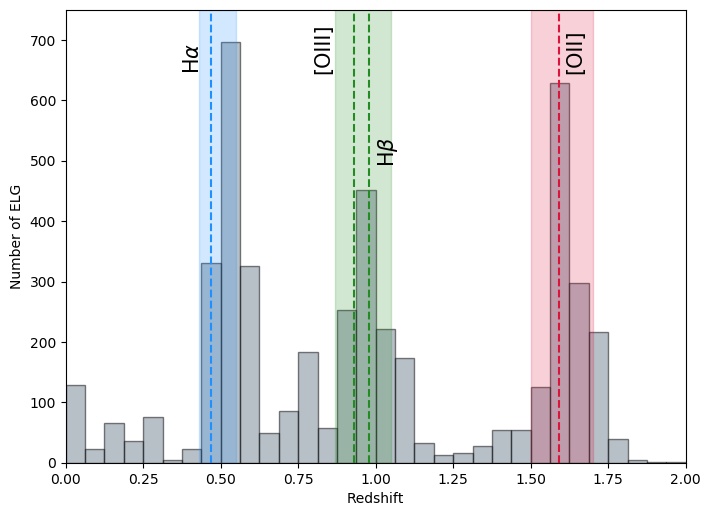

In [4]:
fig,ax=plt.subplots(figsize=(8,6), dpi=100)

bins = np.arange(0,3,0.0625)


ax.hist(data_a['Z_BEST'], bins =bins, histtype ='bar', alpha = 0.5, 
         color = 'slategray',ec = 'k')

ax.vlines(0.47,0,1000, linestyle ='dashed', color = 'dodgerblue')
ax.axvspan(0.43, 0.55, alpha=0.2, color='dodgerblue')
ax.text(0.38, 650, r'H$\alpha$', size = 15, rotation='vertical')

ax.vlines(0.98,0,1000, linestyle ='dashed', color = 'forestgreen')
#ax.axvspan(0.86,1.05, alpha=0.2, color='forestgreen')
ax.text(1, 500, r'H$\beta$', size = 15, rotation='vertical')

ax.vlines(0.93,0,1000, linestyle ='dashed', color = 'forestgreen')
ax.axvspan(0.87,1.05, alpha=0.2, color='forestgreen')
ax.text(0.8, 650, r'[OIII]', size = 15, rotation='vertical')

ax.vlines(1.59,0,1000, linestyle ='dashed', color = 'crimson')
ax.axvspan(1.5, 1.7, alpha=0.2, color='crimson')
ax.text(1.61, 650, r'[OII]', size = 15, rotation='vertical')

# ax.vlines(2.44,0,1000, linestyle ='dashed', color = 'crimson')
# ax.axvspan(1.30, 1.9, alpha=0.2, color='crimson')
# ax.text(2.5, 650, r'MgII', size = 15, rotation='vertical')

#plt.vlines(0.2,0,1000, linestyle ='dashed', color = 'crimson')
ax.set_xlim(0,2)
ax.set_ylim(0,750)
ax.set_xlabel('Redshift')
ax.set_ylabel('Number of ELG')
plt.show()

In [5]:
mask_H = (data_a['Z_BEST']> 0.43) & (data_a['Z_BEST'] < 0.55)
mask_OIII = (data_a['Z_BEST']> 0.87)&  (data_a['Z_BEST'] < 1.05)
mask_OII = (data_a['Z_BEST']> 1.5)&  (data_a['Z_BEST'] < 1.7)

In [22]:
data_H = data_a[mask_H]
data_OIII = data_a[mask_OIII]
data_OII = data_a[mask_OII]

data_H.write('NSF_HA.fits', overwrite = True)
data_OIII.write('NSF_OIII.fits', overwrite = True)
data_OII.write('NSF_OII.fits', overwrite = True)

In [7]:
data_H

NUMBER_1,FLUX_ISO_1,FLUXERR_ISO_1,MAG_ISO_1,MAGERR_ISO_1,FLUX_APER_1 [13],FLUXERR_APER_1 [13],MAGERR_APER_1 [13],MAG_APER_1 [13],FLUX_AUTO_1,FLUXERR_AUTO_1,MAG_AUTO_1,MAGERR_AUTO_1,BACKGROUND_1,ALPHAPEAK_J2000_1,DELTAPEAK_J2000_1,X_IMAGE_1,Y_IMAGE_1,ALPHA_J2000_1,DELTA_J2000_1,FLAGS_1,ELONGATION_1,ELLIPTICITY_1,CLASS_STAR_1,FLUX_RADIUS_1,SNR_WIN_1,MAG_APER_g_1 [13],FLUX_APER_g_1 [13],FLUXERR_APER_g_1 [13],MAGERR_APER_g_1 [13],MAGERR_AUTO_g_1,BACKGROUND_g_1,MAG_AUTO_g_1,MAG_APER_r_1 [13],FLUX_APER_r_1 [13],FLUXERR_APER_r_1 [13],MAGERR_APER_r_1 [13],MAGERR_AUTO_r_1,BACKGROUND_r_1,MAG_AUTO_r_1,MAG_APER_i_1 [13],FLUX_APER_i_1 [13],FLUXERR_APER_i_1 [13],MAGERR_APER_i_1 [13],MAGERR_AUTO_i_1,BACKGROUND_i_1,MAG_AUTO_i_1,MAG_APER_z_1 [13],FLUX_APER_z_1 [13],FLUXERR_APER_z_1 [13],MAGERR_APER_z_1 [13],MAGERR_AUTO_z_1,BACKGROUND_z_1,MAG_AUTO_z_1,MAG_APER_y_1 [13],FLUX_APER_y_1 [13],FLUXERR_APER_y_1 [13],MAGERR_APER_y_1 [13],MAGERR_AUTO_y_1,BACKGROUND_y_1,MAG_AUTO_y_1,IDENT,Z_ML,Z_ML68_LOW,Z_ML68_HIGH,Z_BEST,Z_BEST68_LOW,Z_BEST68_HIGH,CHI_BEST,MOD_BEST,EXTLAW_BEST,EBV_BEST,SCALE_BEST,NBAND_USED,Z_SEC,CHI_SEC,MOD_SEC,Z_QSO,CHI_QSO,MOD_QSO,MOD_STAR,CHI_STAR,CONTEXT,ZSPEC,MAG_OBS0,MAG_OBS1,MAG_OBS2,MAG_OBS3,MAG_OBS4,ERR_MAG_OBS0,ERR_MAG_OBS1,ERR_MAG_OBS2,ERR_MAG_OBS3,ERR_MAG_OBS4,MAG_MOD0,MAG_MOD1,MAG_MOD2,MAG_MOD3,MAG_MOD4,MAG_ABS0,MAG_ABS1,MAG_ABS2,MAG_ABS3,MAG_ABS04,MABS_FILT0,MABS_FILT1,MABS_FILT2,MABS_FILT3,MABS_FILT4,STRING_INPUT
int32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,float64,float32,float32,float64,float64,float32,float32,float64,float64,int16,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64,int32,float64,float64,float64,float32,float32,float32,float32,int16,int16,float32,float32,int16,float32,float32,int16,float32,float32,int16,int16,float32,int16,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,int16,int16,int16,int16,int16,int16
4178,25.464865,1.5595572,23.485147,0.06651043,13.54197 .. 30.99252,0.90969574 .. 6.0183873,0.072953165 .. 0.2108886,24.183972010967025 .. 23.28503478562523,32.831554,3.0842466,23.22244704758812,0.10202051,-0.00071864296,316.43088004858635,-67.0076029735034,19029.814,2755.7397,316.43091505333916,-67.00762260682004,0,1.0699239,0.06535405,0.5820286,1.7028306,18.477047,27.23138232357557 .. 25.18432421810682,0.81918794 .. 5.3976774,0.37427148 .. 2.4415338,0.4961729 .. 0.49123085,0.38412976,0.0013399217,25.62790675289686,26.85355068503902 .. 25.96164966880367,1.0658592 .. 2.4235964,0.2783121 .. 1.922571,0.28357115 .. 0.8614933,0.33545643,0.006365593,25.6852958327441,26.71791764158976 .. 25.37347527403605,1.2527 .. 4.3213973,0.21982577 .. 1.4591857,0.19057299 .. 0.36670446,0.18531477,0.0018168502,25.353654107043862,26.09055347136762 .. 24.70593089751508,2.1733794 .. 7.780082,0.28055856 .. 1.8666387,0.14019024 .. 0.26055887,0.13863629,0.0014360668,24.74253863982465,25.764285006450926 .. 98.99073497288158,3.0944245 .. -1.0215013,0.8614494 .. 5.779073,0.3023289 .. 99.0,0.38078555,0.0148056485,24.668778338360106,4178,1.3668,0.5125,1.6923,0.4904,0.4635,0.5225,1.55779,31,1,0.3,145.556,5,1.44,1.85977,26,2.36,0.0665537,3,138,5.14247,0,-99.0,23.747,23.254,23.201,22.691,22.239,0.469,0.221,0.167,0.133,0.27,23.96,23.355,23.088,22.757,22.308,-18.48616,-19.08515,-18.95323,-19.11185,-19.16674,2,3,3,3,3,0
4412,7.810413,1.0037836,24.768314,0.13957123,5.918641 .. 8.945969,0.8857656 .. 5.9606028,0.16252741 .. 0.7235901,25.082621226665267 .. 24.634108195659408,13.05091,2.9773905,24.224074015971908,0.24775638,0.020214844,316.3749178225942,-67.0038647424587,19321.691,2802.6462,316.3749763652563,-67.003891493

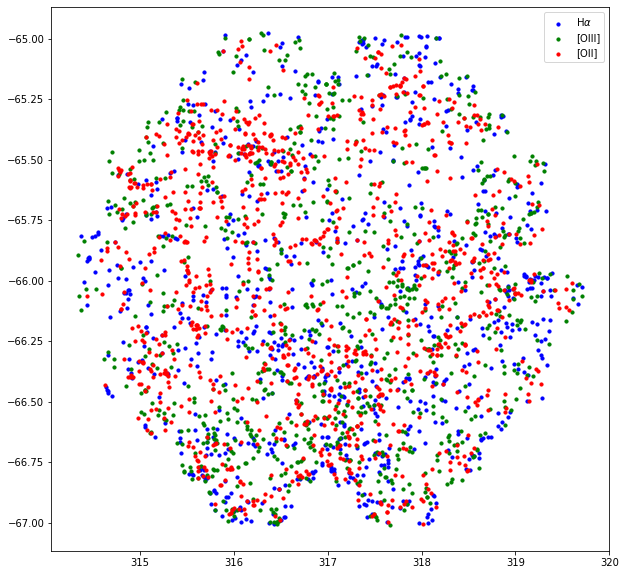

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data_H['ALPHA_J2000_1'],data_H['DELTA_J2000_1'], s =10, color = 'b', label = r'H$\alpha$')

ax.scatter(data_OIII['ALPHA_J2000_1'],data_OIII['DELTA_J2000_1'], s =10, color = 'green', label = '[OIII]')

ax.scatter(data_OII['ALPHA_J2000_1'],data_OII['DELTA_J2000_1'], s =10, color = 'red', label = '[OII]')
plt.legend()
plt.show()

In [20]:
aper =2
g = np.array([data_a['FLUX_APER_g_1'][i][aper] for i in range(len(data_a))])

r = np.array([data_a['FLUX_APER_r_1'][i][aper] for i in range(len(data_a))])

i = np.array([data_a['FLUX_APER_i_1'][i][aper] for i in range(len(data_a))])

z = np.array([data_a['FLUX_APER_z_1'][i][aper] for i in range(len(data_a))])

y = np.array([data_a['FLUX_APER_y_1'][i][aper] for i in range(len(data_a))])

NB = np.array([data_a['FLUX_APER_1'][i][aper] for i in range(len(data_a))])

NB_m = np.array([data_a['MAG_APER_1'][i][aper] for i in range(len(data_a))])

z_m = np.array([data_a['MAG_APER_z_1'][i][aper] for i in range(len(data_a))])

g_err = np.array([data_a['FLUXERR_APER_g_1'][i][aper] for i in range(len(data_a))])

r_err = np.array([data_a['FLUXERR_APER_r_1'][i][aper] for i in range(len(data_a))])

i_err = np.array([data_a['FLUXERR_APER_i_1'][i][aper] for i in range(len(data_a))])

z_err = np.array([data_a['FLUXERR_APER_z_1'][i][aper] for i in range(len(data_a))])

y_err = np.array([data_a['FLUXERR_APER_y_1'][i][aper] for i in range(len(data_a))])

NB_err = np.array([data_a['FLUXERR_APER_1'][i][aper] for i in range(len(data_a))])

NSF_NB = fits.open('Fields/nsf_nb964_sci.fits')
data_NB = NSF_NB[1].data
hdr_NB = NSF_NB[1].header

NSF_g = fits.open('Fields/nsf_g_sci.fits')
data_g = NSF_g[1].data
hdr_g = NSF_g[1].header

NSF_r = fits.open('Fields/nsf_r_sci.fits')
data_r = NSF_r[1].data
hdr_r = NSF_r[1].header

NSF_i = fits.open('Fields/nsf_i_sci.fits')
data_i = NSF_i[1].data
hdr_i = NSF_i[1].header

NSF_z = fits.open('Fields/nsf_z_sci.fits')
data_z = NSF_z[1].data
hdr_z = NSF_z[1].header

NSF_y = fits.open('Fields/nsf_y_sci.fits')
data_y = NSF_y[1].data
hdr_y = NSF_y[1].header


info = pd.read_csv('Fields.txt', sep = " ")

In [44]:
brillo = NB
sigma = data_a['Z_BEST'] - data_a['Z_BEST68_LOW']
sigma_ = data_a['Z_BEST68_HIGH'] - data_a['Z_BEST']
sig = (sigma+sigma_)/data_a['Z_BEST']
ew =  z_m -NB_m

/tmp/ipykernel_148/45743075.py:4: RuntimeWarning: divide by zero encountered in divide
  sig = (sigma+sigma_)/data_a['Z_BEST']


In [46]:
len(NB_m)

29

In [13]:
def cuts_mult(coords, data_filters, hdr_filters, names_filters, flux_filters, flux_errors, size, field):

    #data_filters = datag,datar,datai,dataz,datay, datanb
    #hdr_filters = hdrg, hdrr, hdri, hdrz, hdry, hdrnb
    # el path en el cual guardaremos las imágenes
    path = os.path.join('Cutouts', str(field))

    sigmac = []
    
                
    for j in range(len(data_filters)):        
        aper = random_apers(data_filters[j])
        sums = aper['aperture_sum']
        clipped = sigma_clipped_stats(sums, sigma=2)
        sigmac_ = clipped[2]
        sigmac.append(sigmac_)

    print(sigmac)
    names = get_names(coords)  # función amanda

    for i in range(len(coords)):

        path_N = os.path.join(path, str(i))

        fig =plt.figure(figsize=(16,10))
        #X = [ (2,1,1),(2,5,6), (2,5,7), (2,5,8) , (2,5,9) , (2,5,10)]
        X = [ [2,1,1],[2,6,7], [2,6,8] , [2,6,9] , [2,6,10], [2,6,11],[2,6,12]]
        
        ax= fig.add_subplot(2,1,1)
        pivot = np.array([4770.80, 6371.30, 7774.20, 9157.90, 9640.00, 9886.30]) #g,r,i,z,NB,y,
        lines = np.array([flux_filters[j][i] for j in range(6)])
        err = np.array([flux_errors[j][i] for j in range(6)])
        #ax.errorbar(pivot[0], flux_filters[0][i], yerr=(errx,erry), fmt='.')
        
        for j, piv in enumerate(pivot):
            ax.errorbar(piv, lines[j], yerr = err[j], label = names_filters[j], fmt='o', capsize=2, ms=5, elinewidth=1)

        #ax.set_title(str(flux_filters[4][i]))
        ax.set_xlabel('Wavelength')
        ax.set_ylabel('Flux')
        ax.set_title("ID: "+ str(i))
        
        ax.plot(pivot,lines, linestyle = 'dashed', color = 'slategray')
        plt.legend(loc =2)
        # print(path_N)
        
        for x, plot_data in enumerate(X[1:]):
            nrows, ncols, plot_number = plot_data[0], plot_data[1], plot_data[2]
            
            ax= fig.add_subplot(nrows, ncols, plot_number)
            data = data_filters[x]
            #x = k
            #sub.set_xticks([])
            #sub.set_yticks([]) 
        #for x, data in enumerate(data_filters):

                # nos retorna la desviación estandar que ocuparemos para que se vean bien los lya en los recortes
           # print(x,(x+1)//5, x-((x+1)//5 *5))
            m_wcs = WCS(hdr_filters[x])
            c = SkyCoord(coords[i][0], coords[i][1], frame=FK5, unit="deg")
            recorte = Cutout2D(
                data, c, (size*u.arcsec, size*u.arcsec), wcs=m_wcs)
            im = (recorte.data)
#ax[(x)//5, x-((x)//5 * 5)]
            ax.imshow(im, origin='lower', interpolation='nearest',
                                              cmap='Greys', vmin=-1*sigmac[x], vmax=3*sigmac[x])  # , norm = norm)
#             ax.scatter((len(recorte.data)/2),len(recorte.data)/2-3, marker='|', color='red', s=300)
#             ax.scatter((len(recorte.data)/2) -5, len(recorte.data)/2, marker='_', color='red', s=300)
            ax.set_title(names_filters[x], fontsize=18)
            ax.axis('off')

#         ax[1, 1].set_axis_off()
#         ax[1, 2].set_axis_off()
#         ax[1, 3].set_axis_off()
#         ax[1, 4].set_axis_off()

        plt.savefig(path_N, transparent=False, facecolor='white')
        fig.tight_layout()
        plt.show()
        


    return

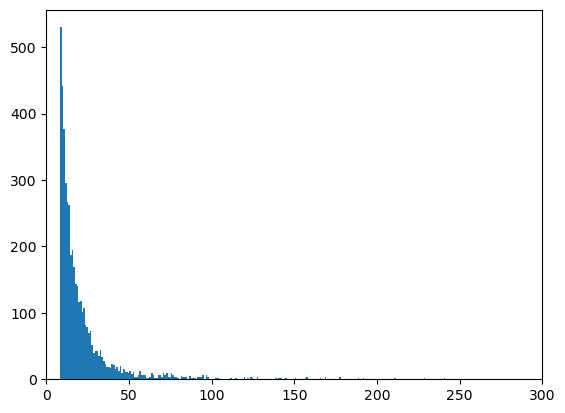

In [14]:
bins = np.arange(np.min(NB),np.max(NB), 1)
plt.hist(NB, bins = bins)
plt.xlim(0,300)
plt.show()

In [15]:
%%time

mask =  (NB > 250) &(NB < 500) & (g !=0) & (r!=0) & (i!=0)
data_a = data_a[mask]
RA_ = data_a['ALPHA_J2000_1']
DEC_ = data_a['DELTA_J2000_1']
print(len(data_a))

29
CPU times: user 9.29 ms, sys: 750 µs, total: 10 ms
Wall time: 6.68 ms


In [16]:
aper =2
g = np.array([data_a['FLUX_APER_g_1'][i][aper] for i in range(len(data_a))])

r = np.array([data_a['FLUX_APER_r_1'][i][aper] for i in range(len(data_a))])

i = np.array([data_a['FLUX_APER_i_1'][i][aper] for i in range(len(data_a))])

z = np.array([data_a['FLUX_APER_z_1'][i][aper] for i in range(len(data_a))])

y = np.array([data_a['FLUX_APER_y_1'][i][aper] for i in range(len(data_a))])

NB = np.array([data_a['FLUX_APER_1'][i][aper] for i in range(len(data_a))])

g_err = np.array([data_a['FLUXERR_APER_g_1'][i][aper] for i in range(len(data_a))])

r_err = np.array([data_a['FLUXERR_APER_r_1'][i][aper] for i in range(len(data_a))])

i_err = np.array([data_a['FLUXERR_APER_i_1'][i][aper] for i in range(len(data_a))])

z_err = np.array([data_a['FLUXERR_APER_z_1'][i][aper] for i in range(len(data_a))])

y_err = np.array([data_a['FLUXERR_APER_y_1'][i][aper] for i in range(len(data_a))])

NB_err = np.array([data_a['FLUXERR_APER_1'][i][aper] for i in range(len(data_a))])

[0.22232307155604572, 0.2562741626020923, 0.24990299576337136, 0.4001652719516787, 0.9915234171804773, 1.114847037619112]


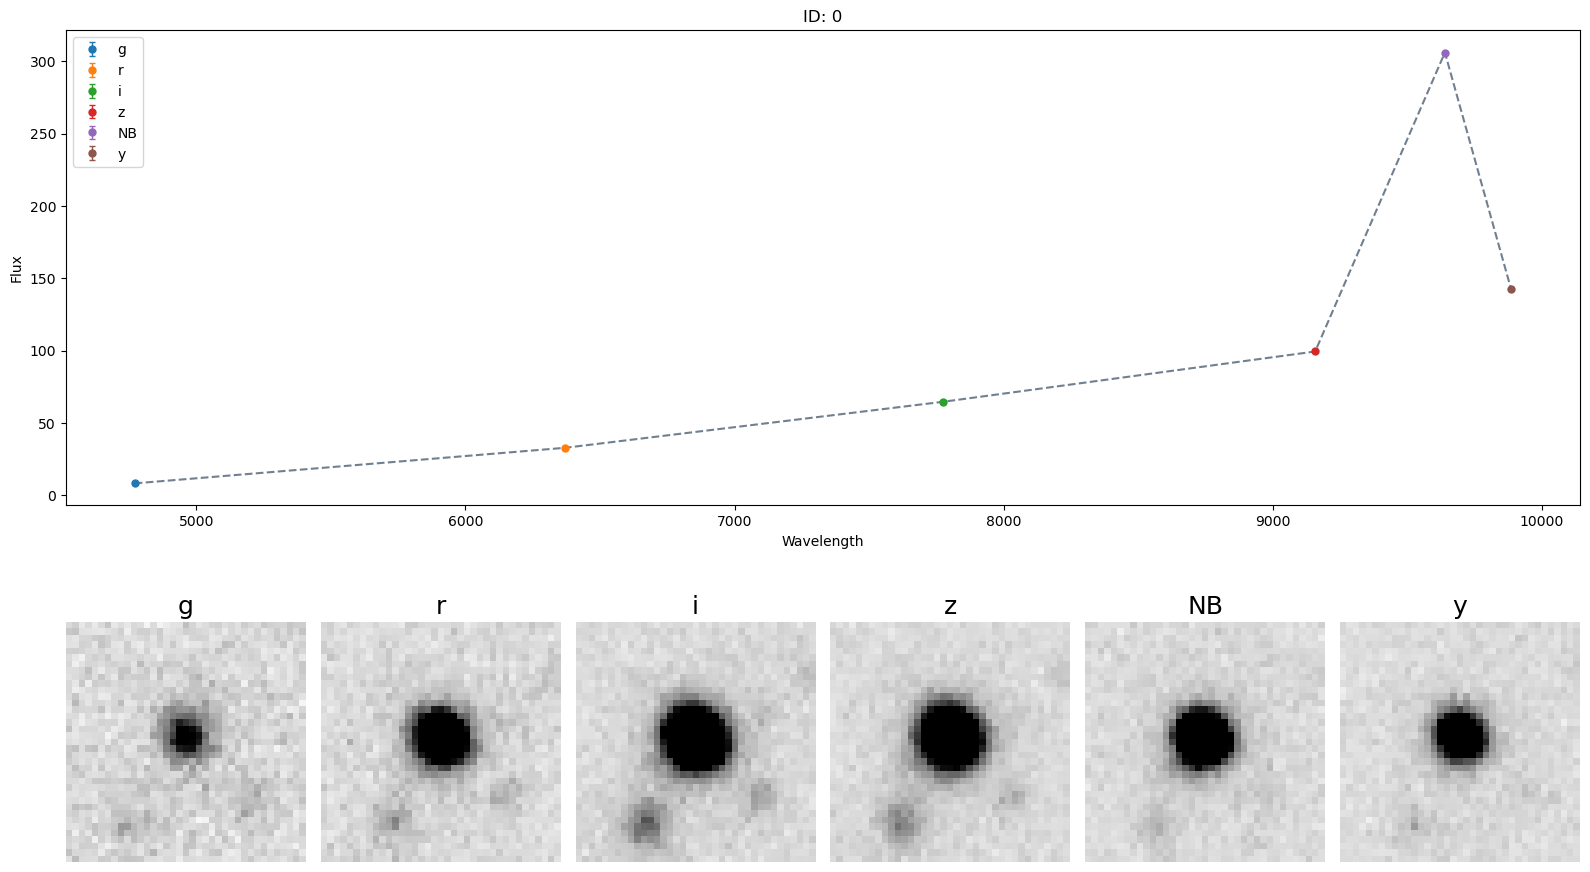

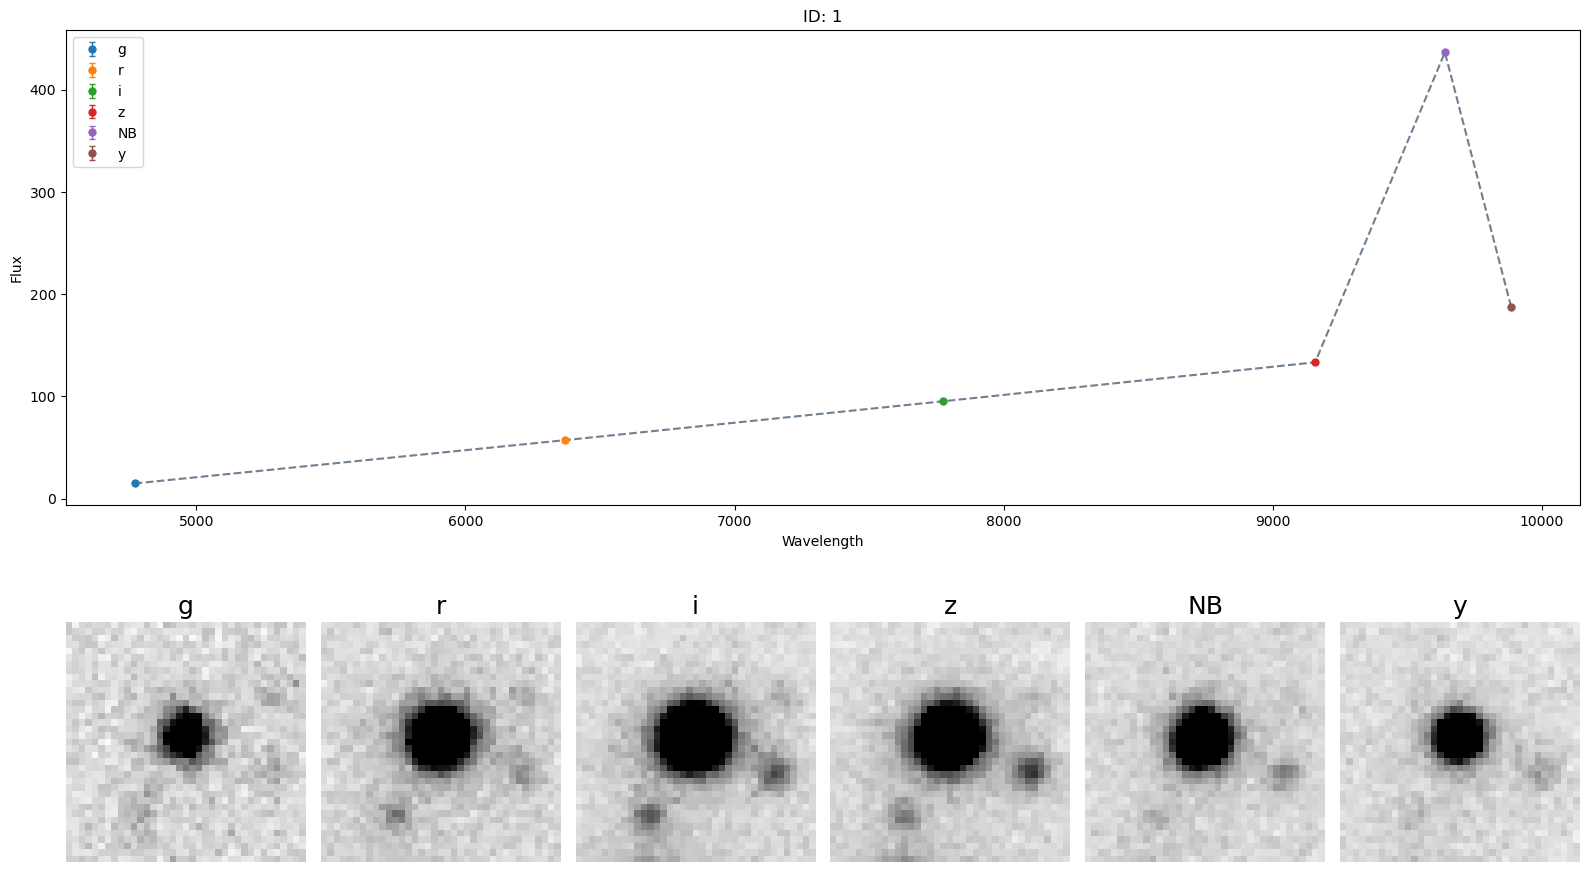

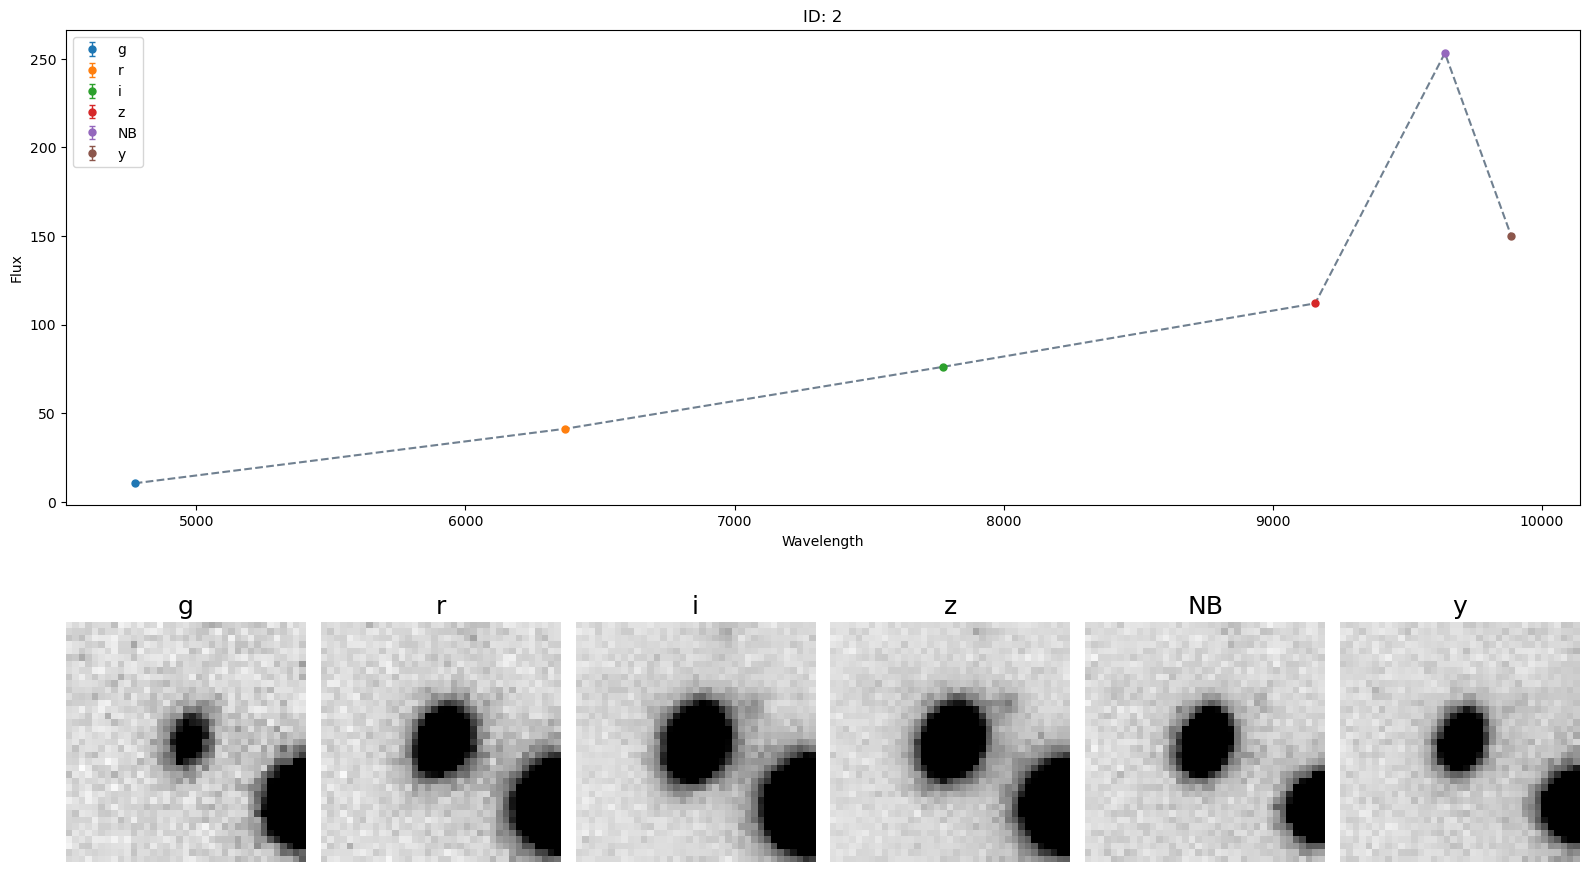

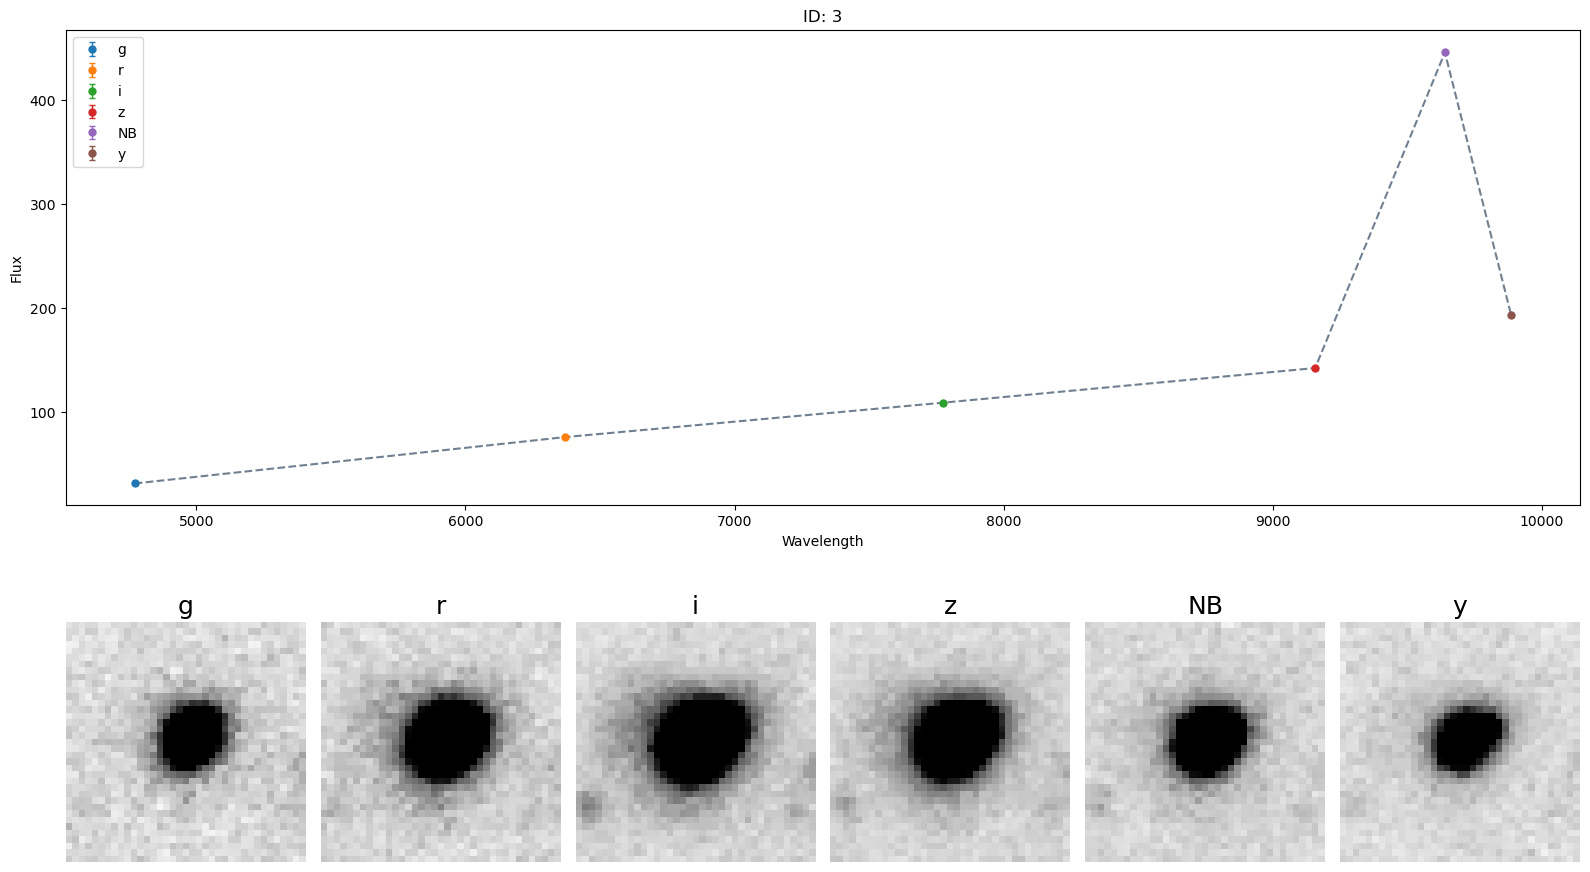

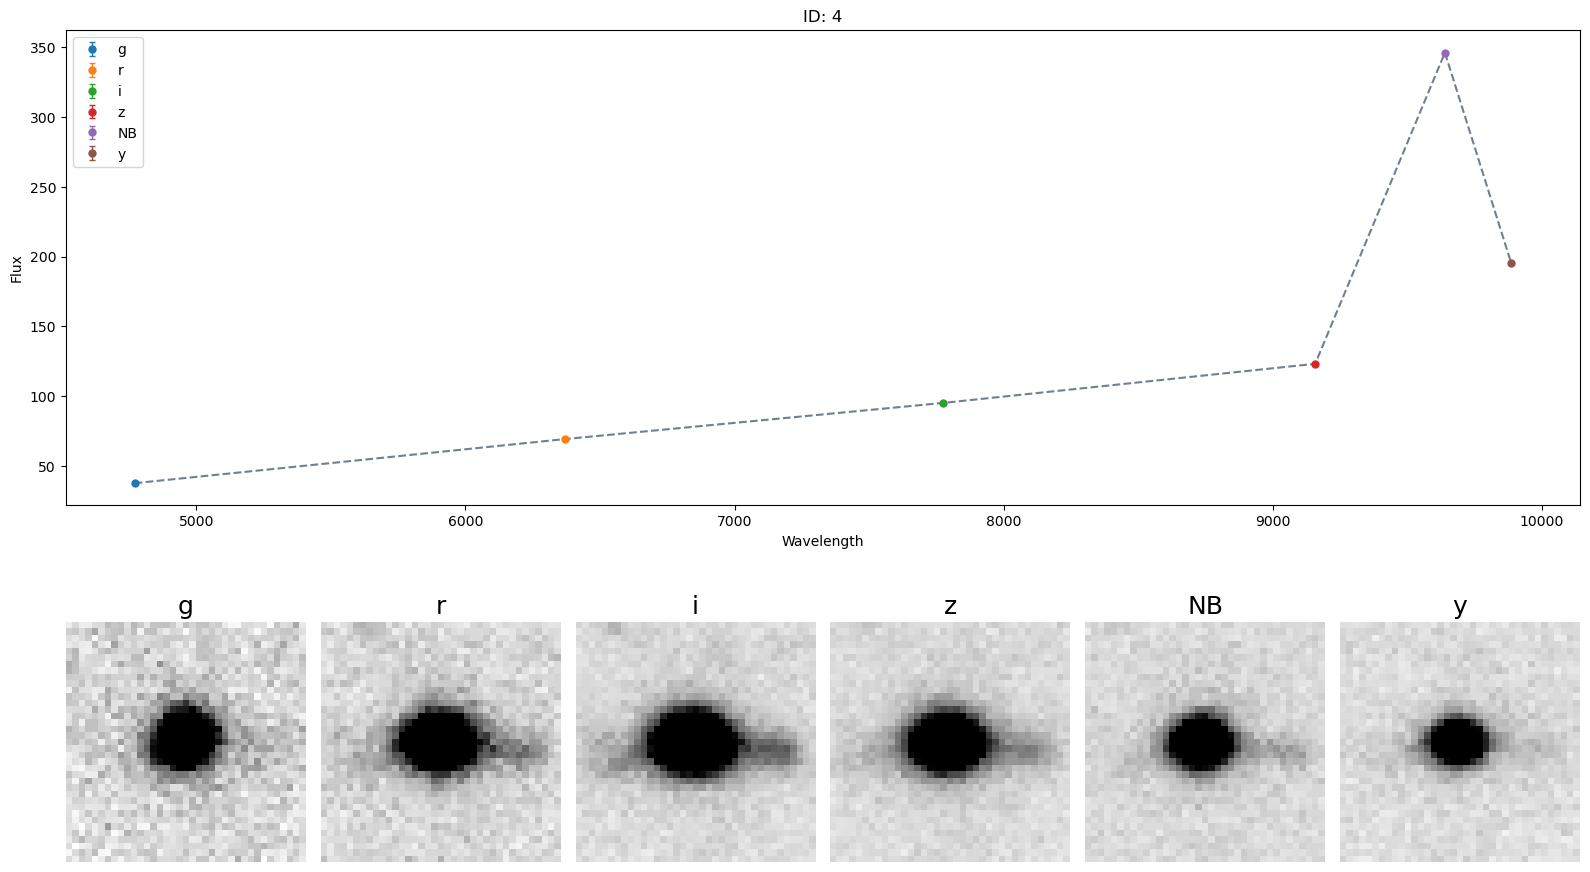

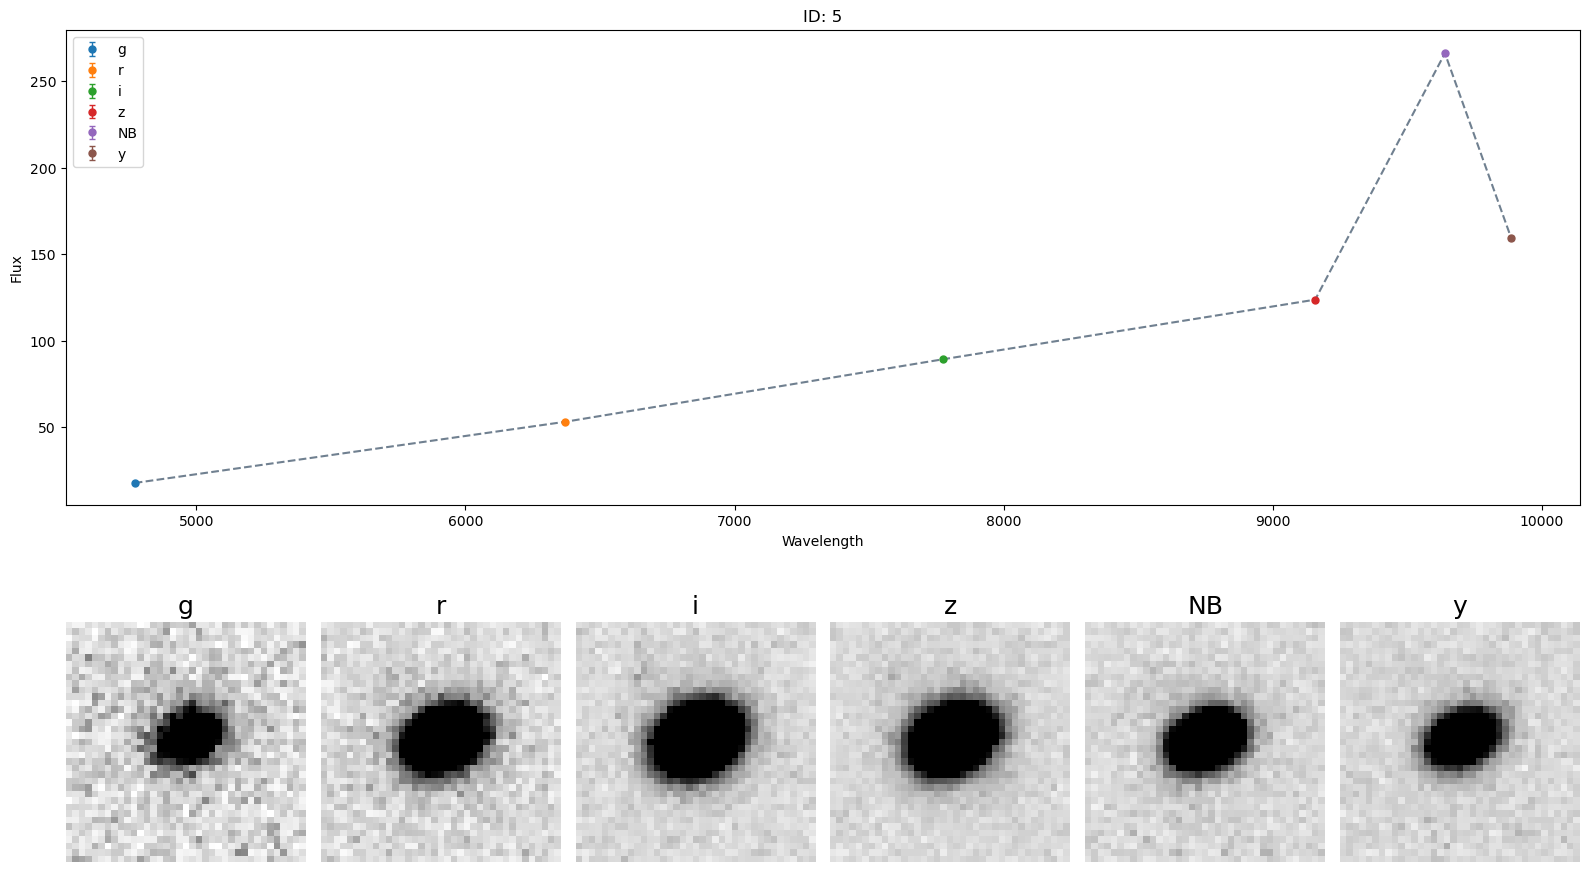

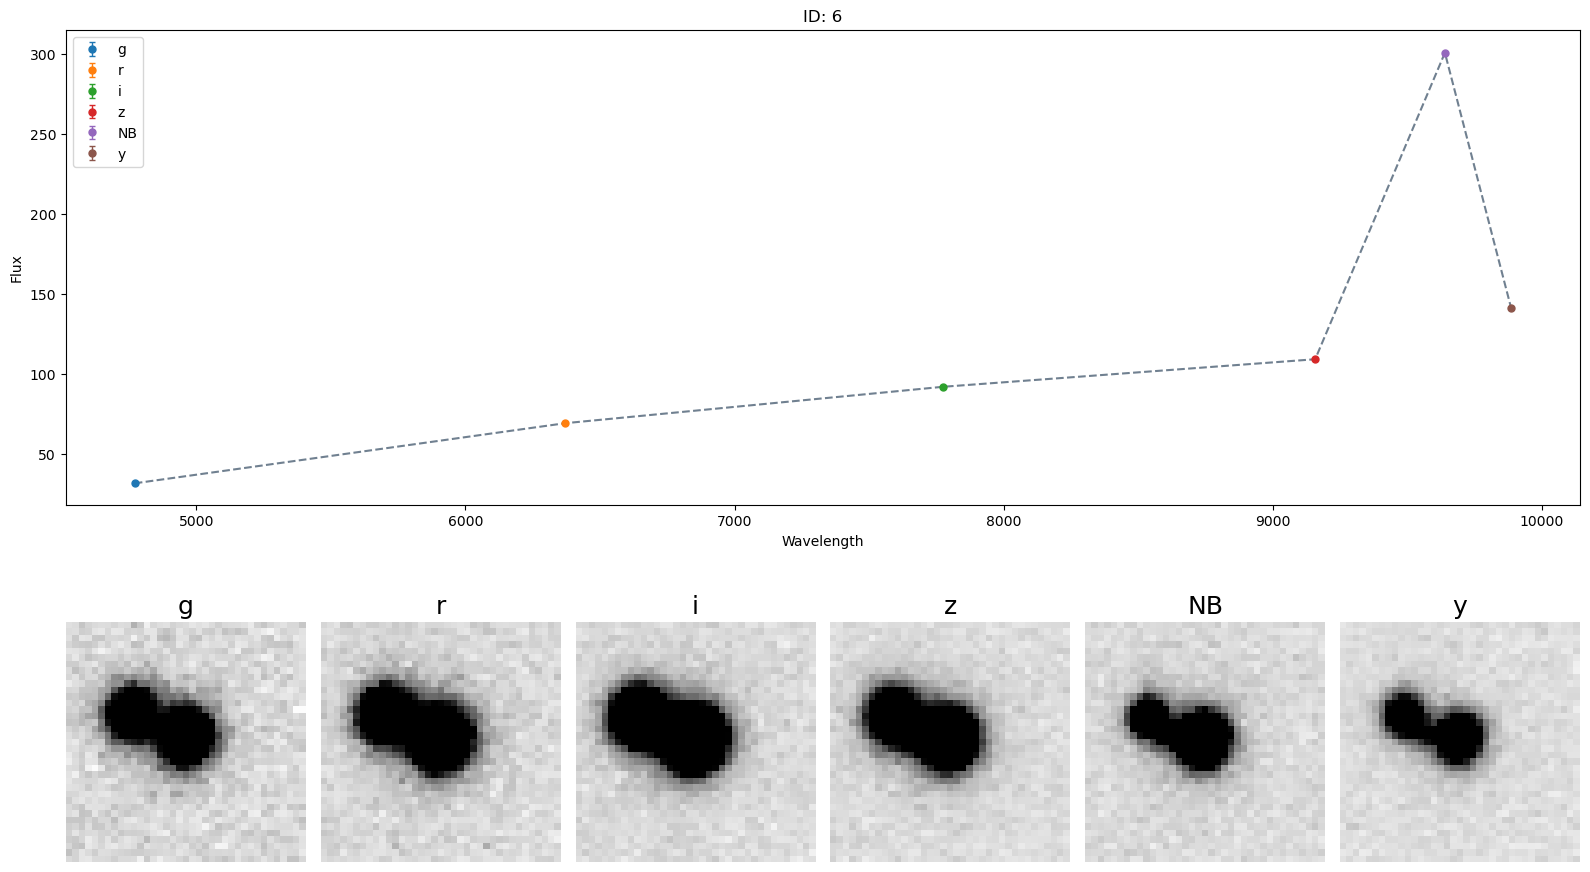

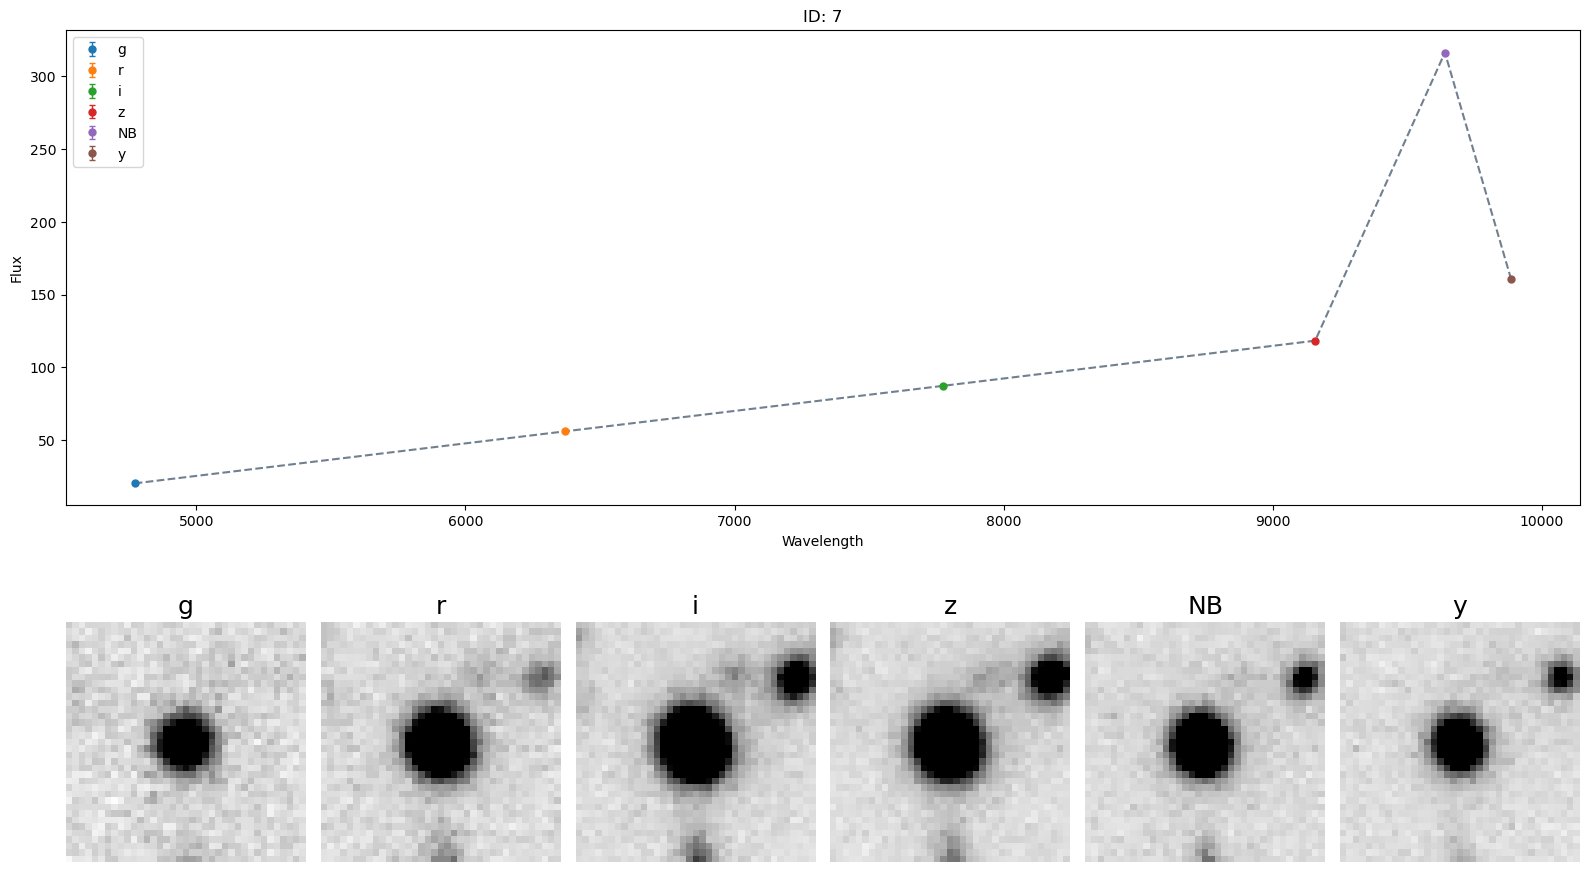

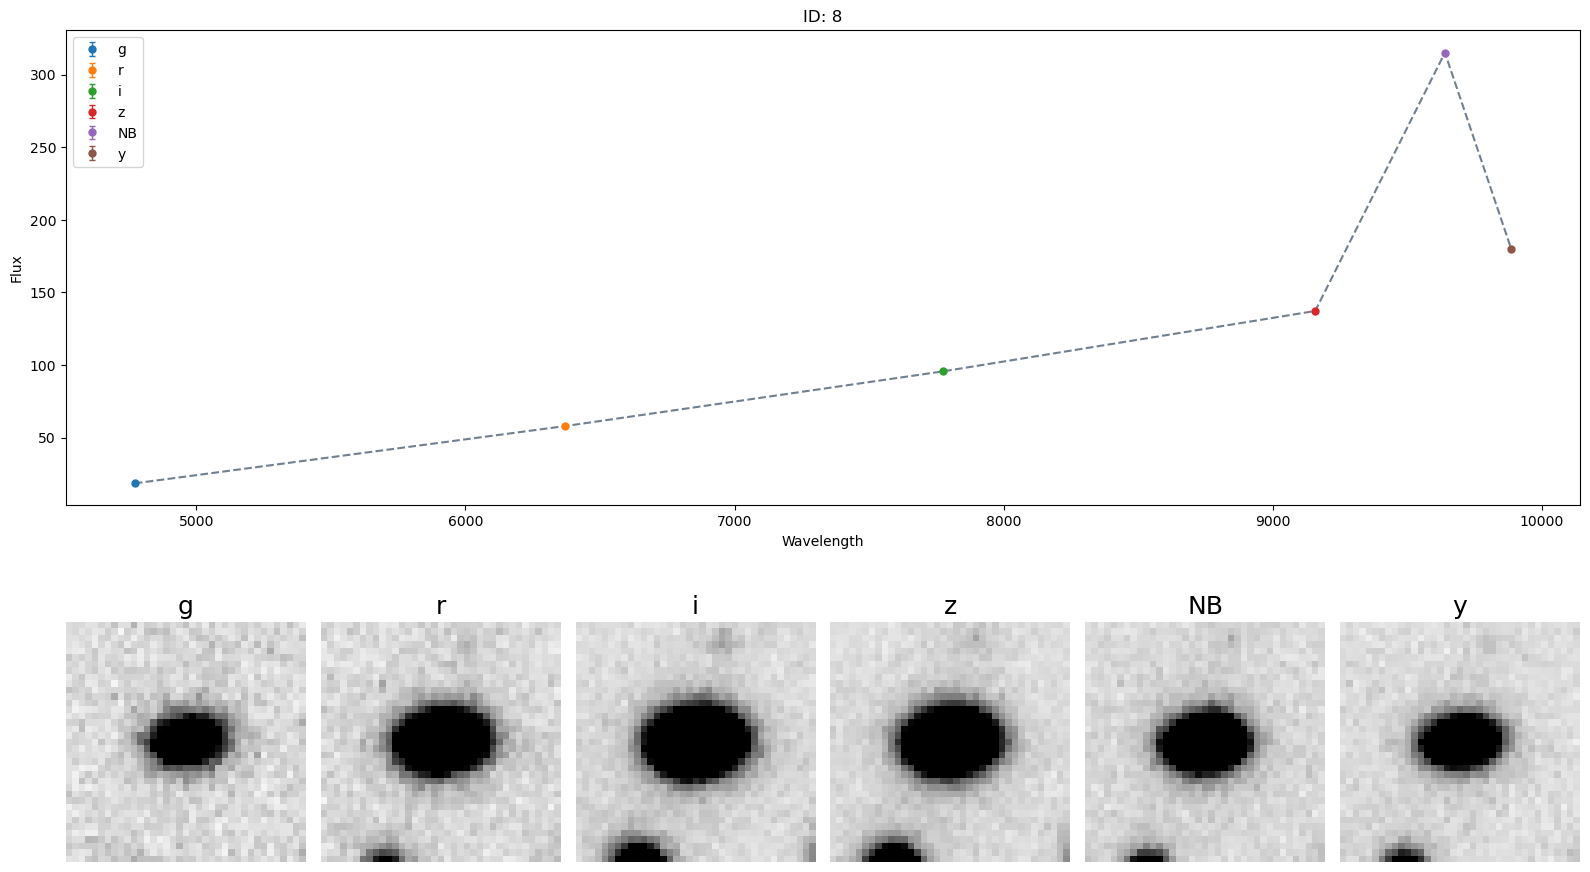

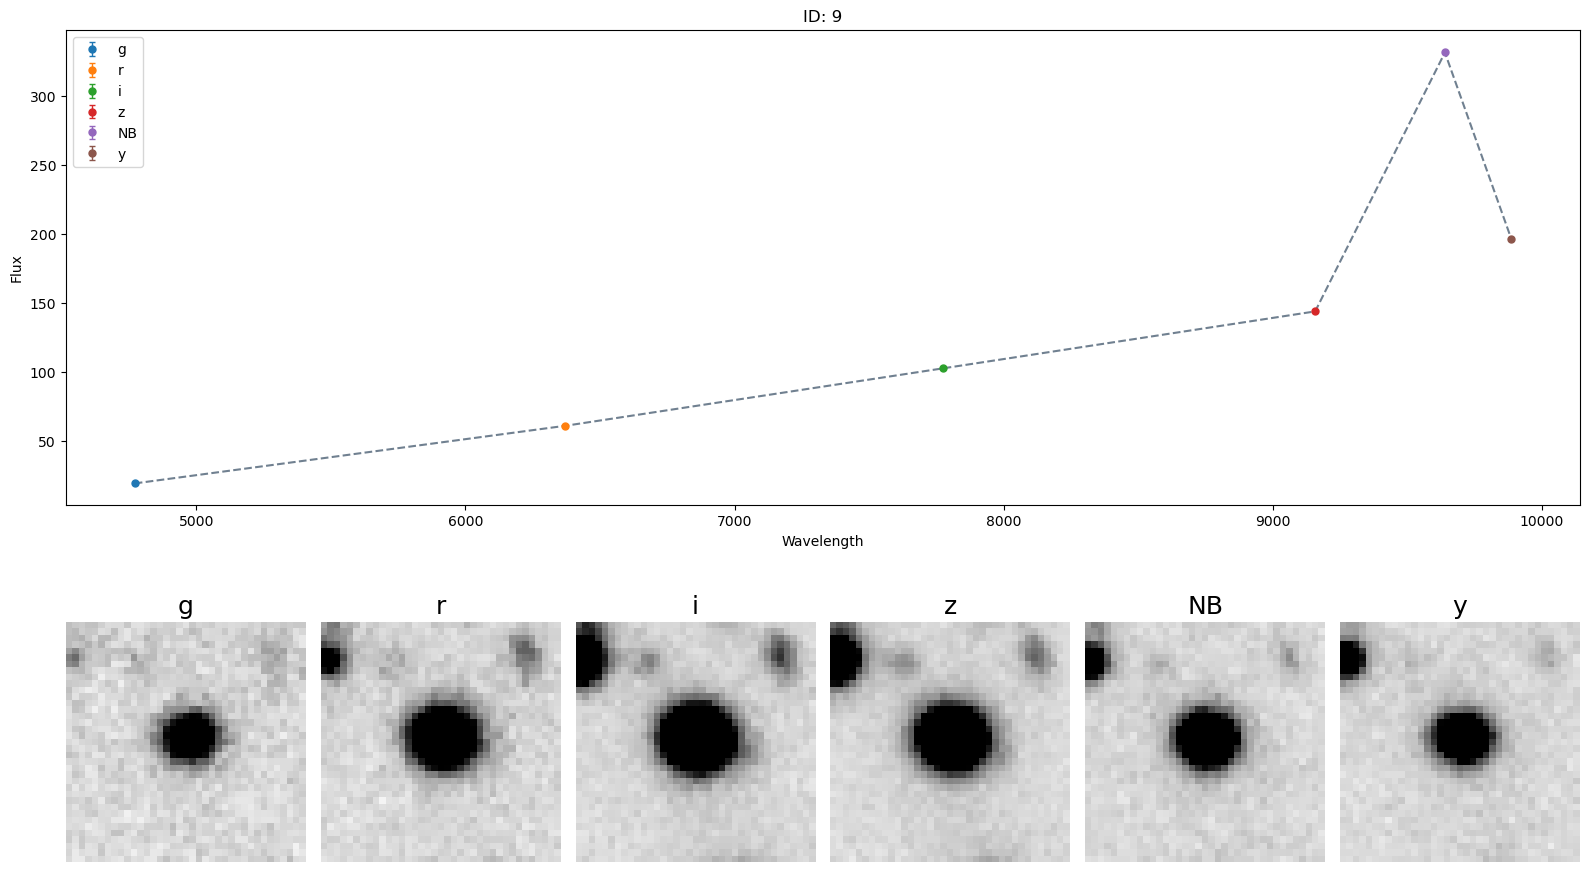

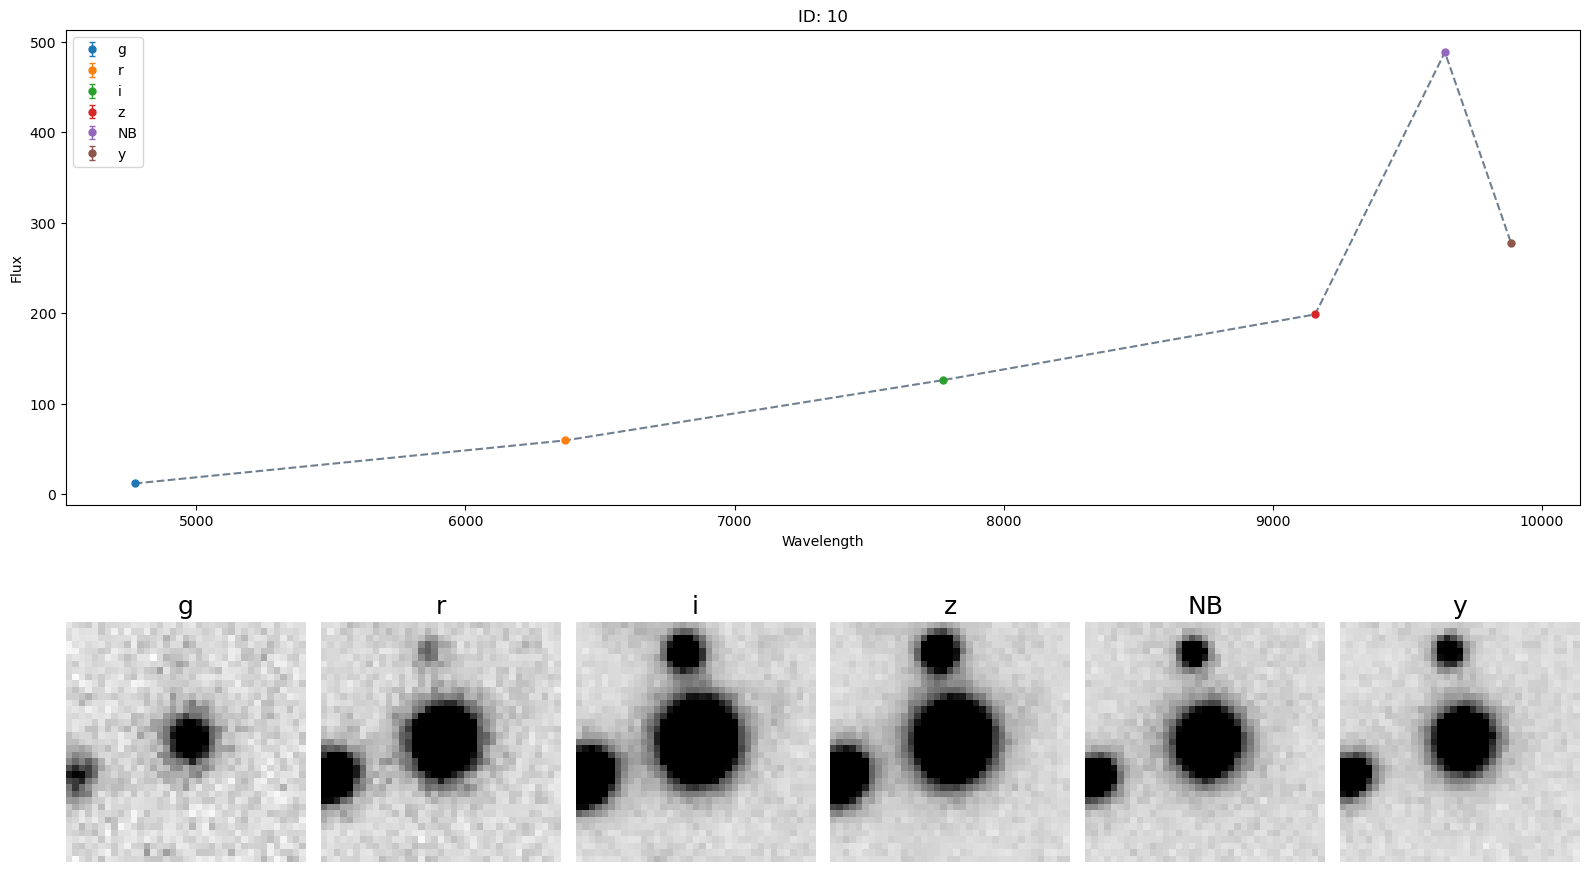

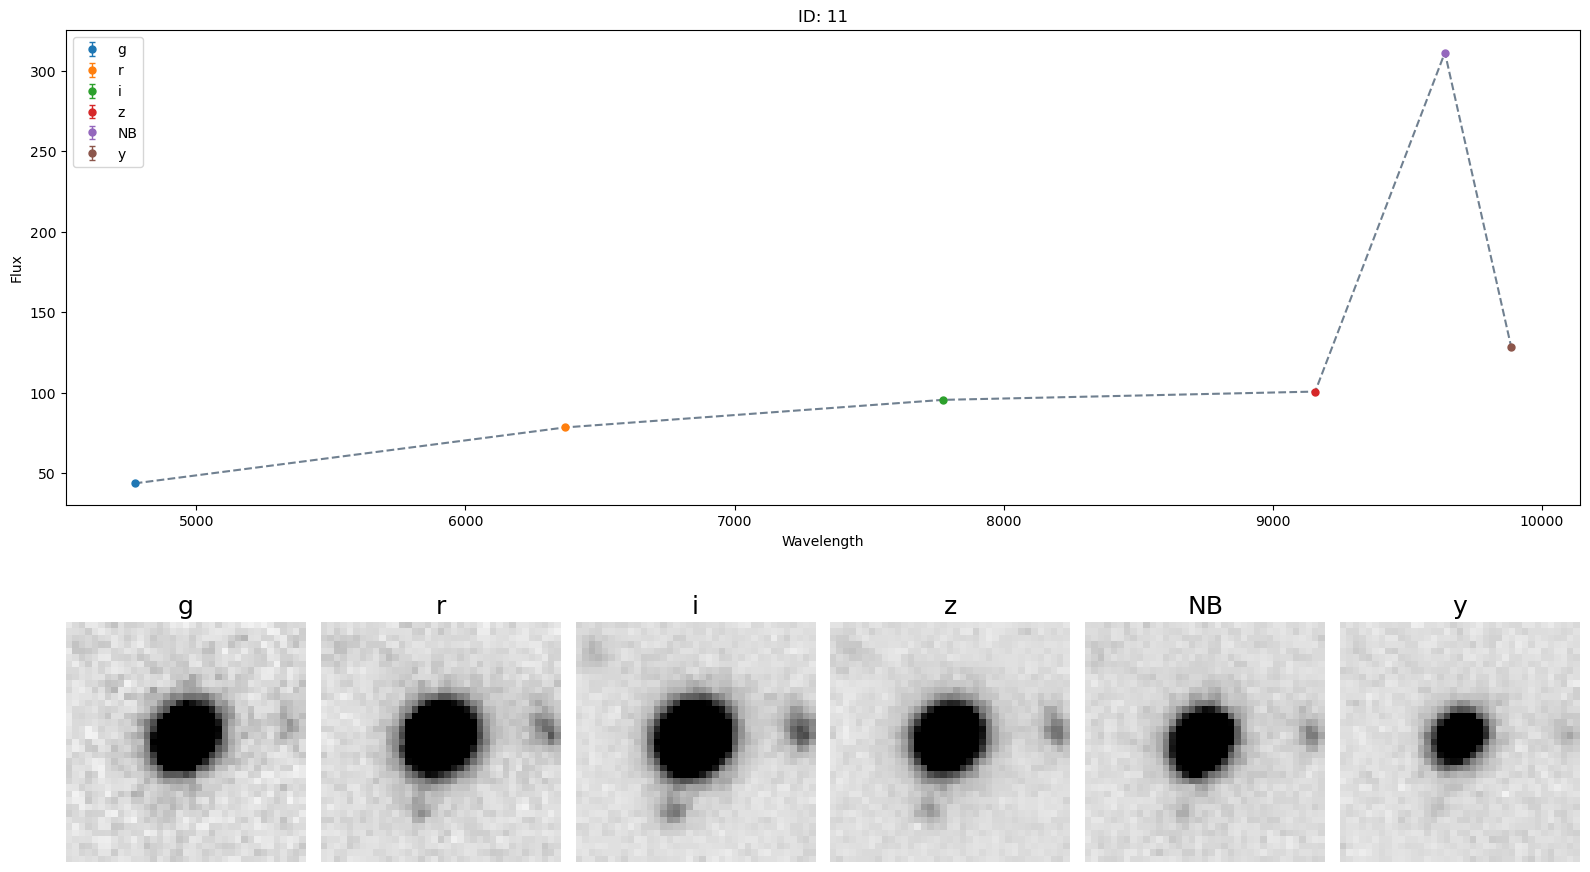

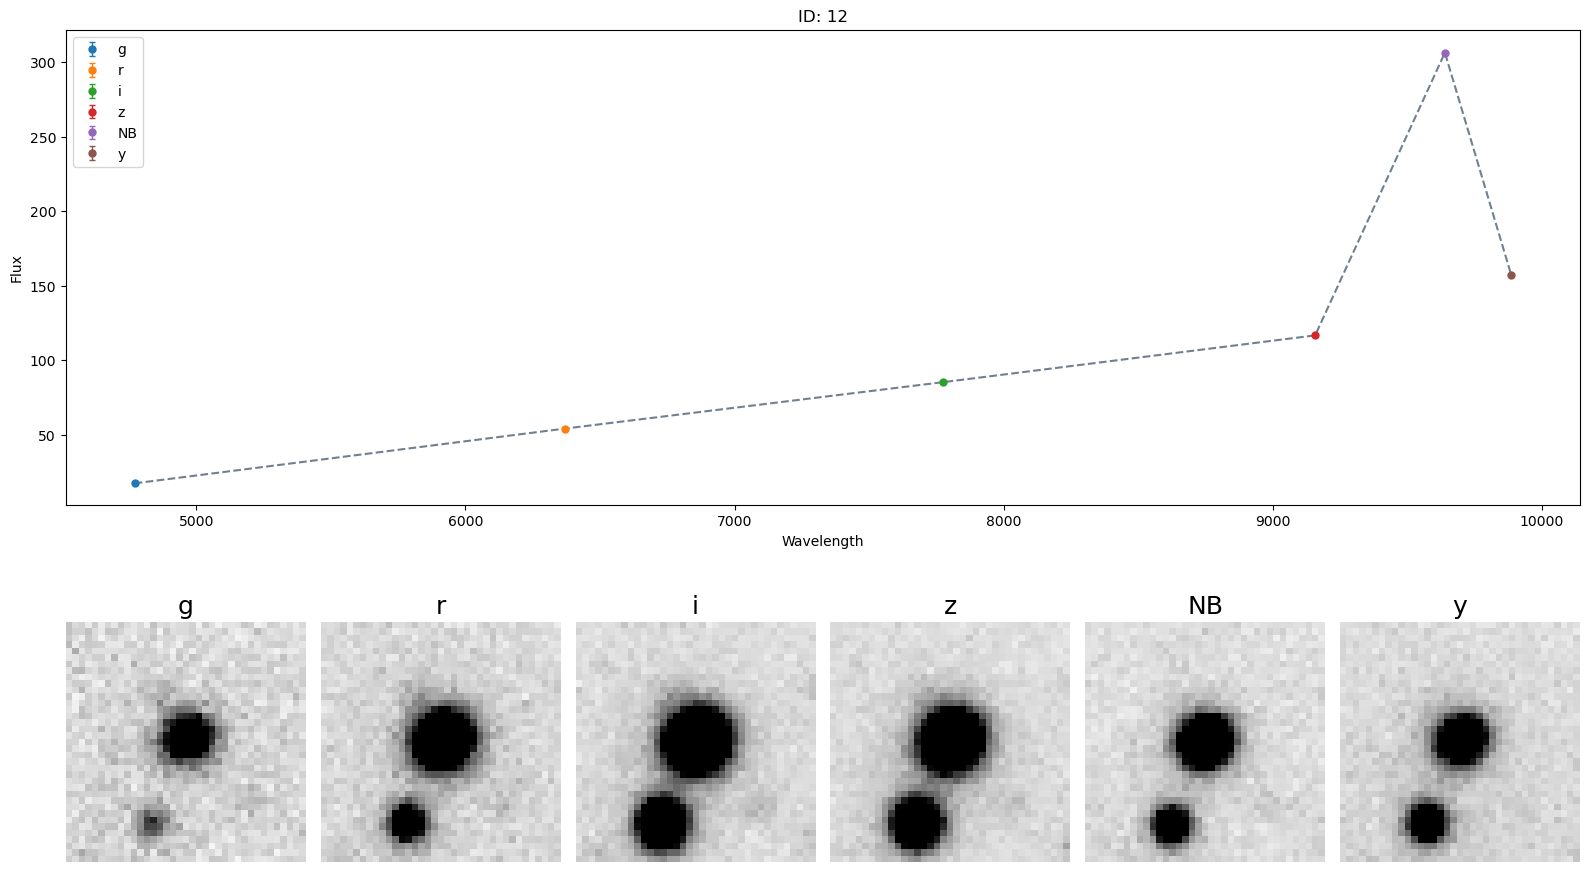

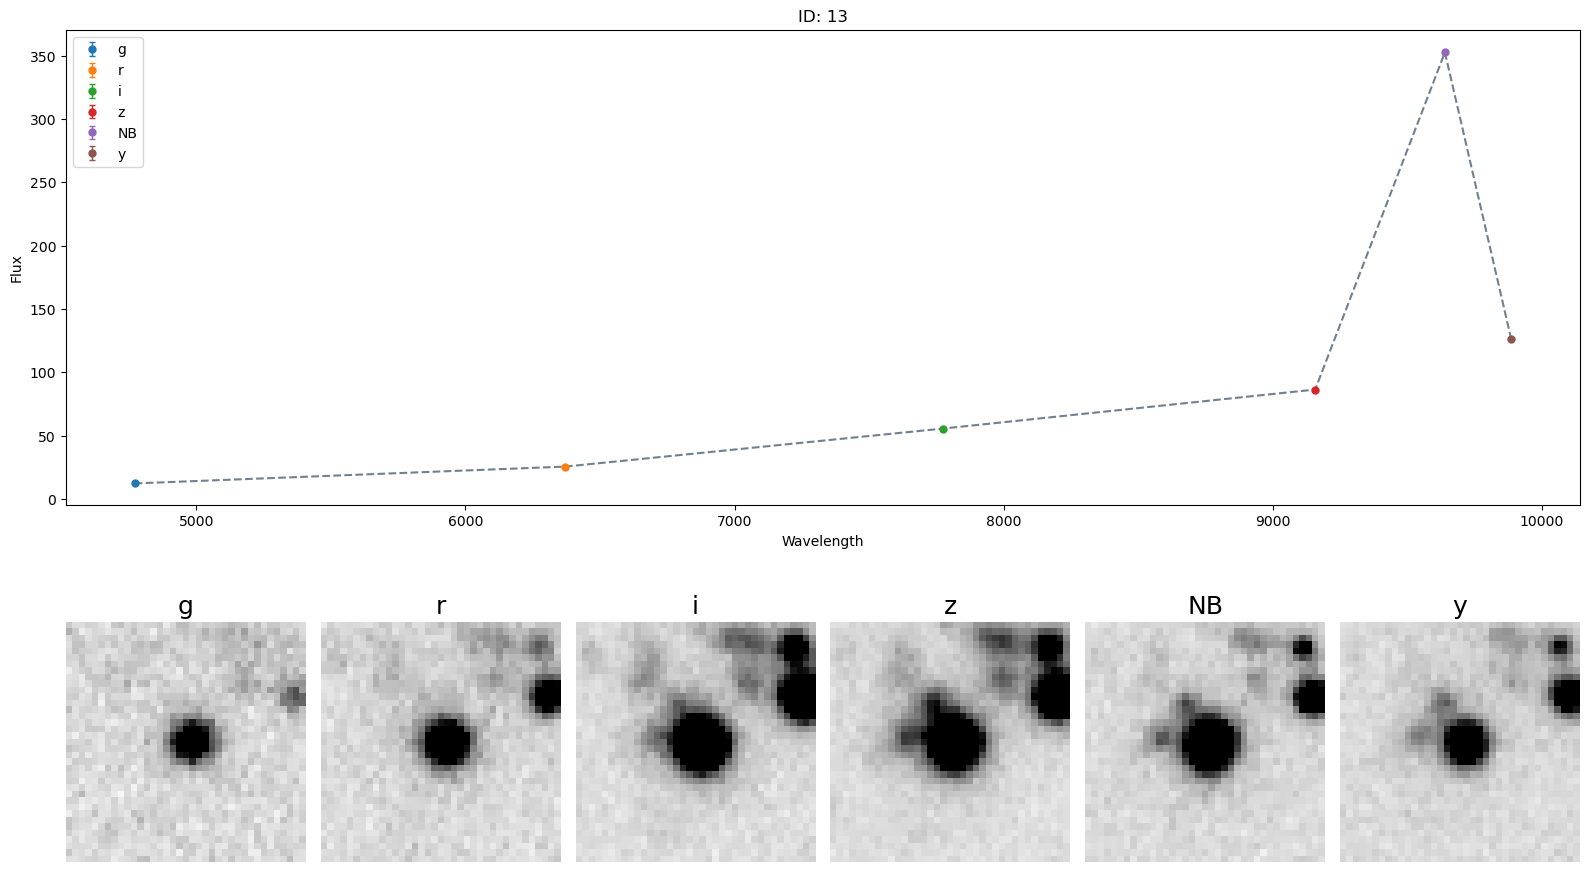

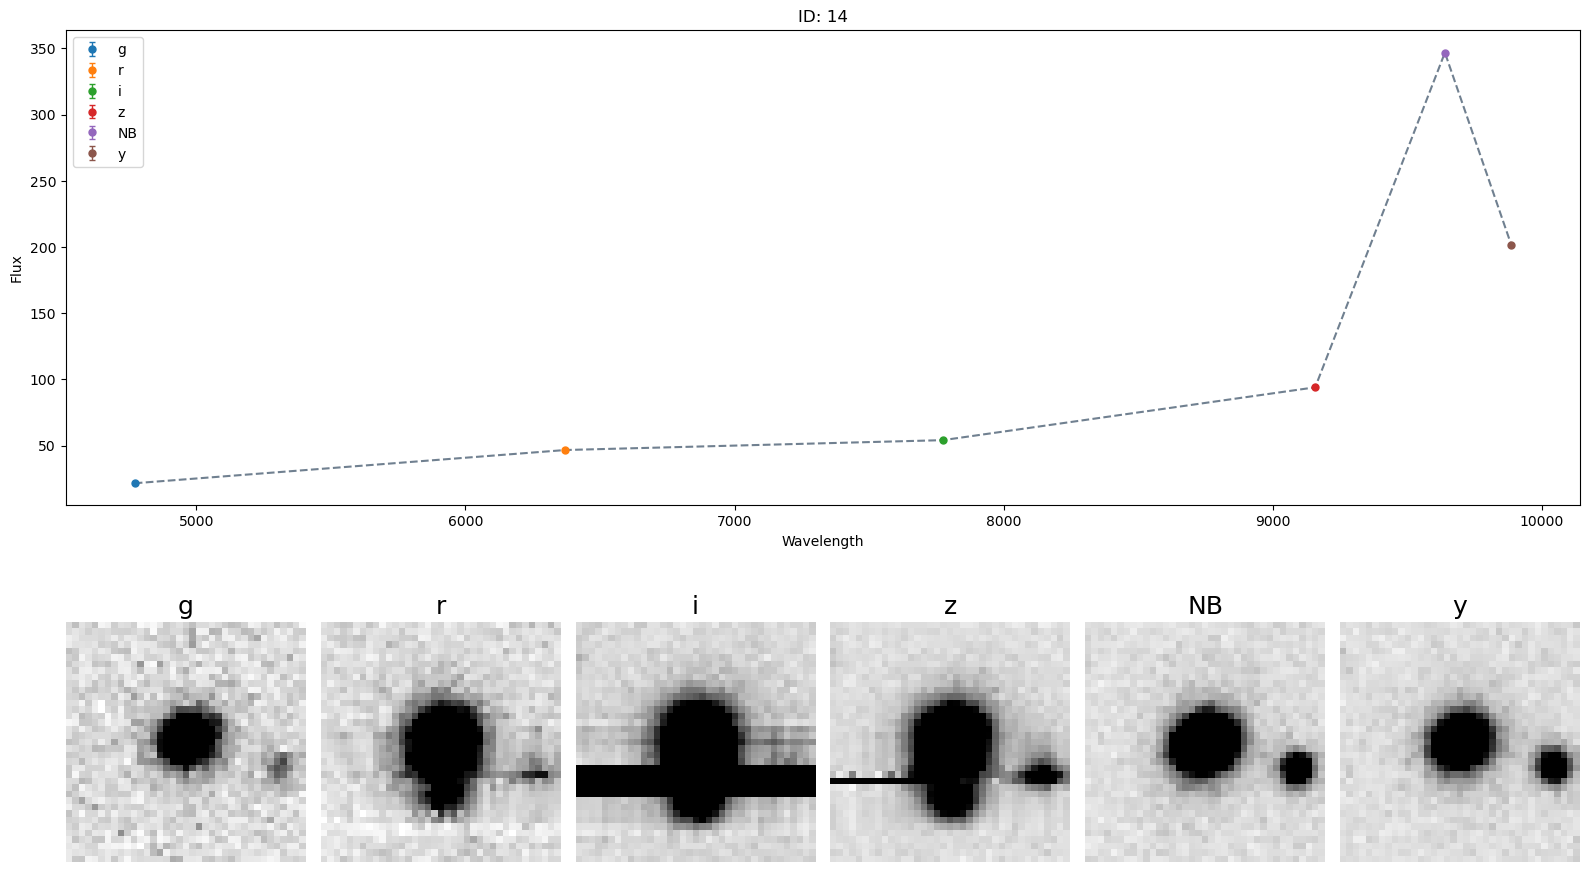

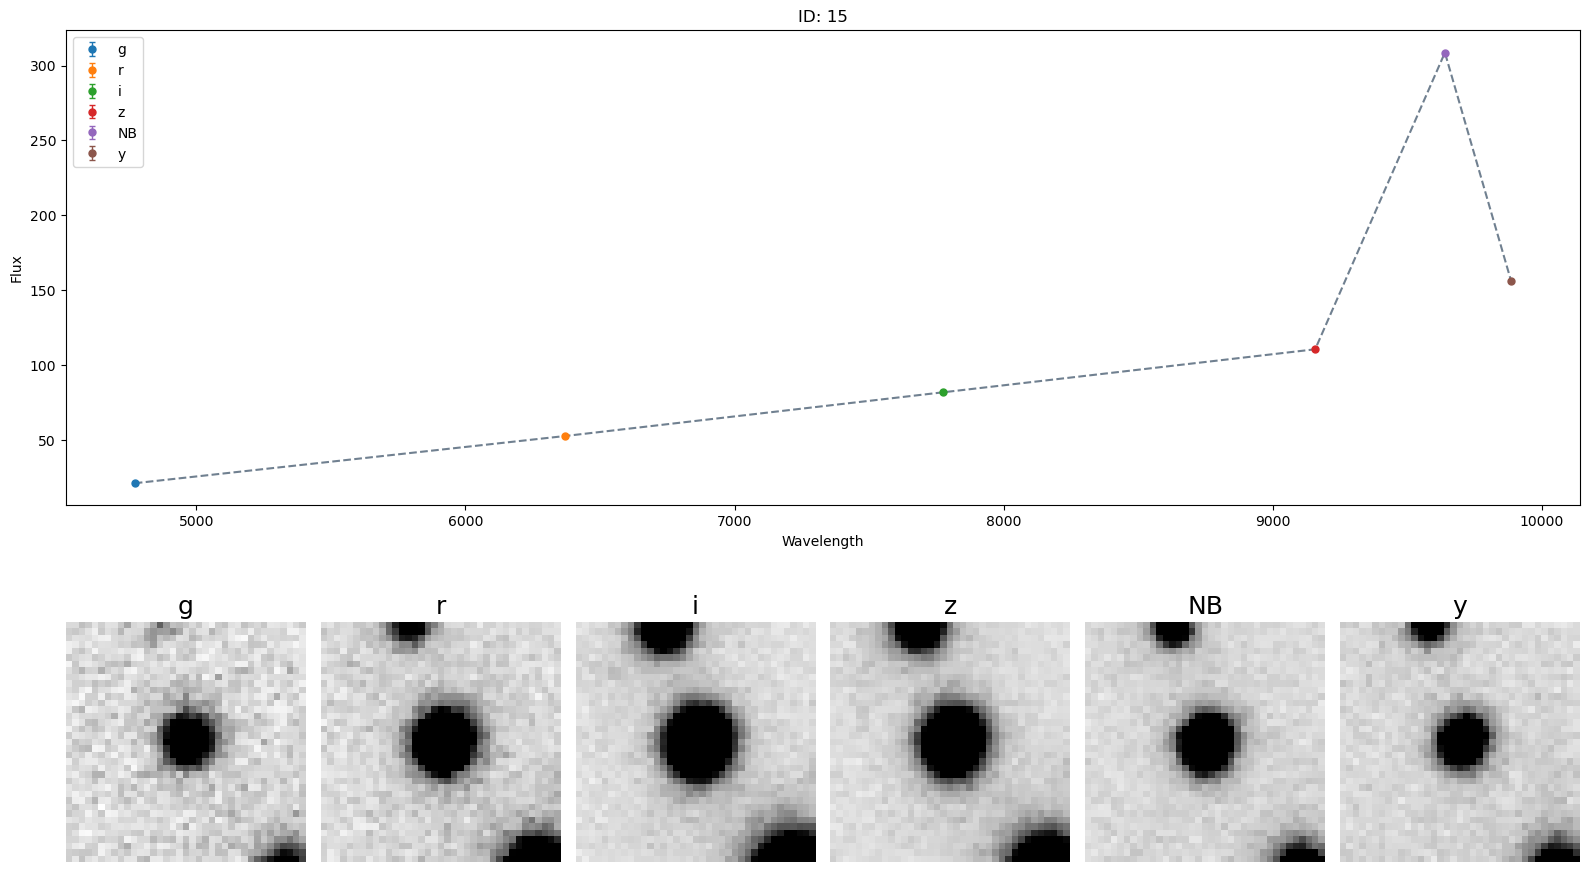

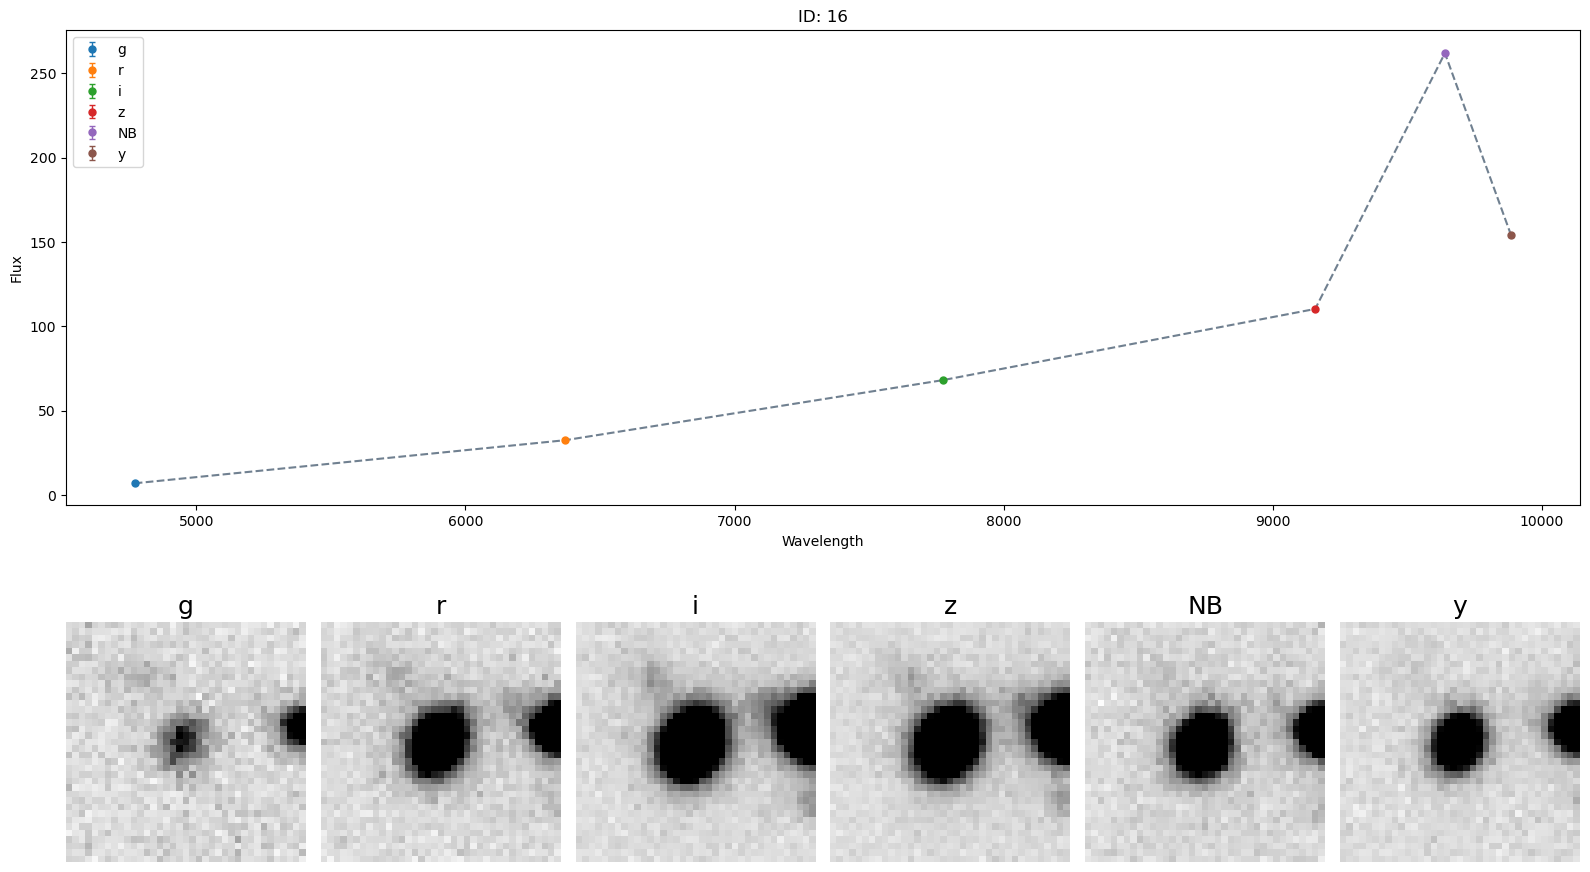

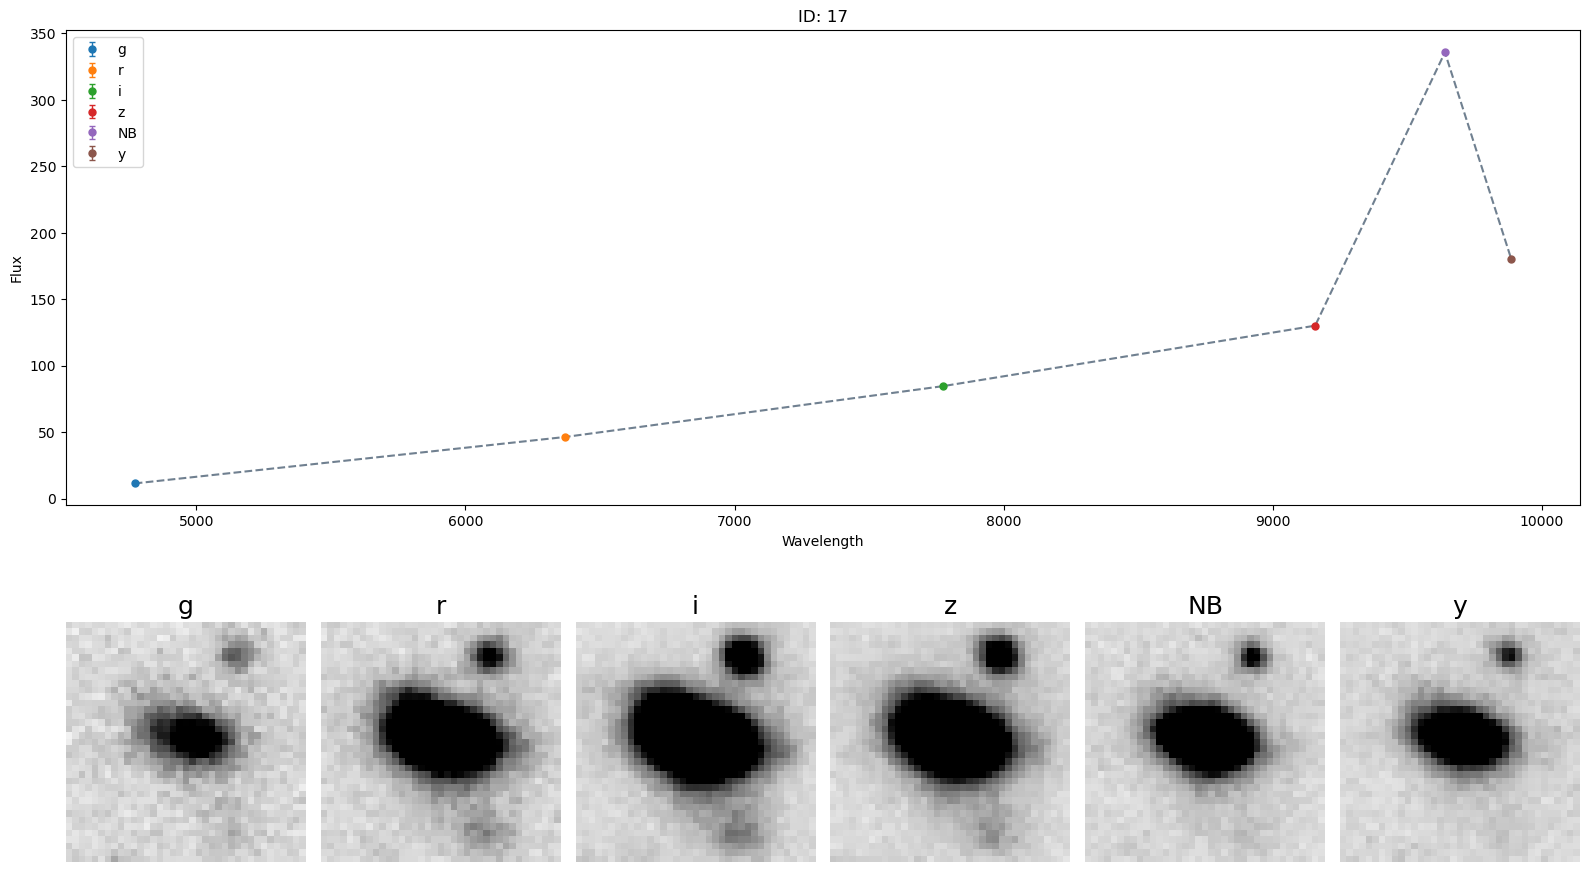

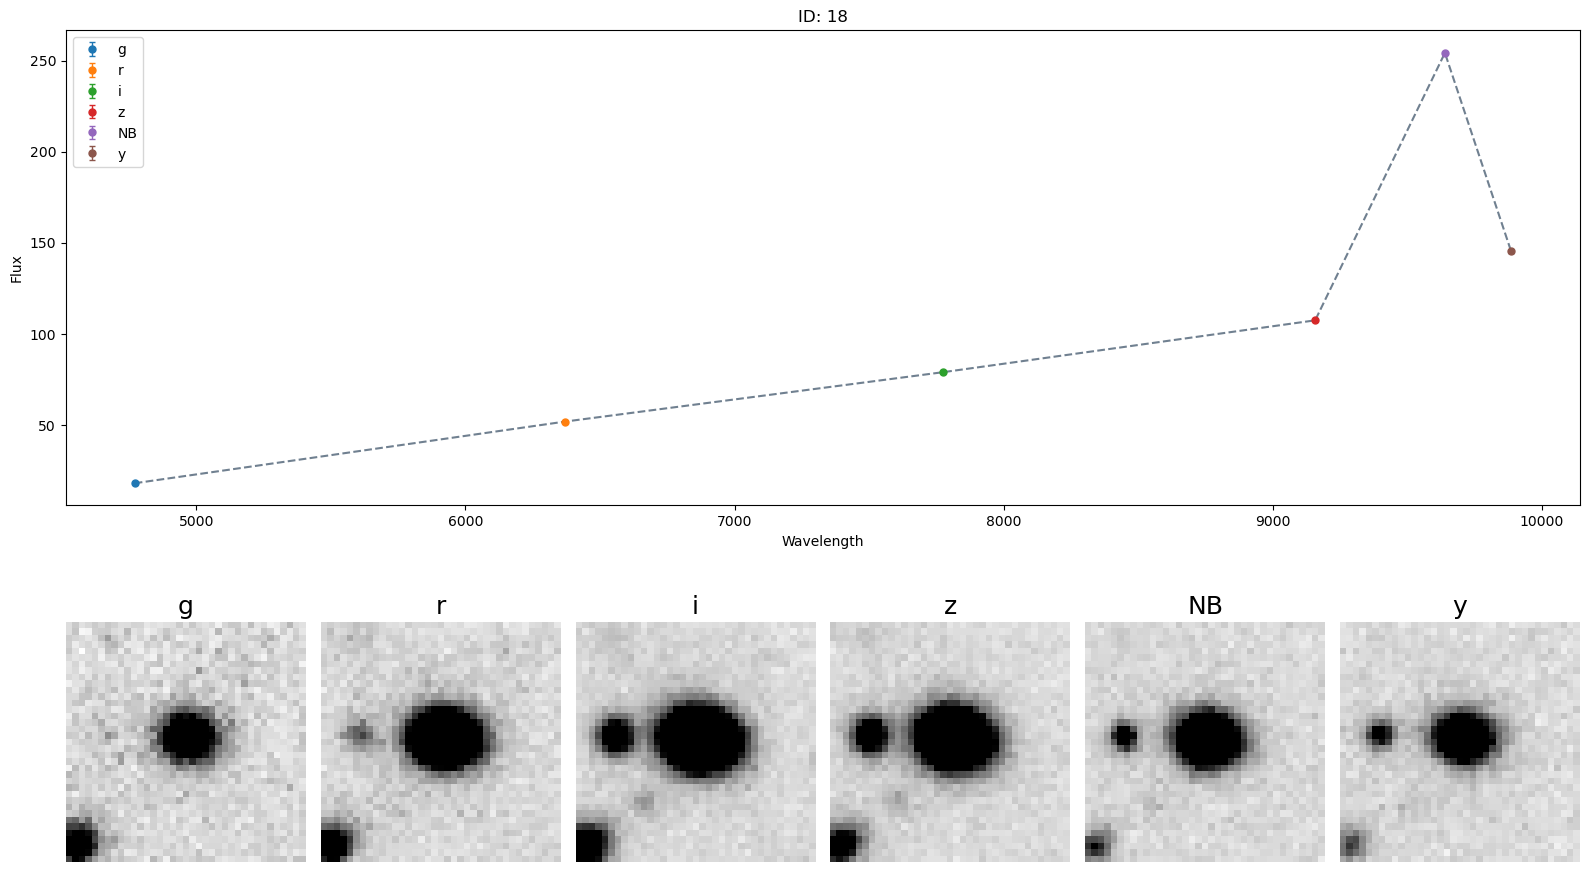

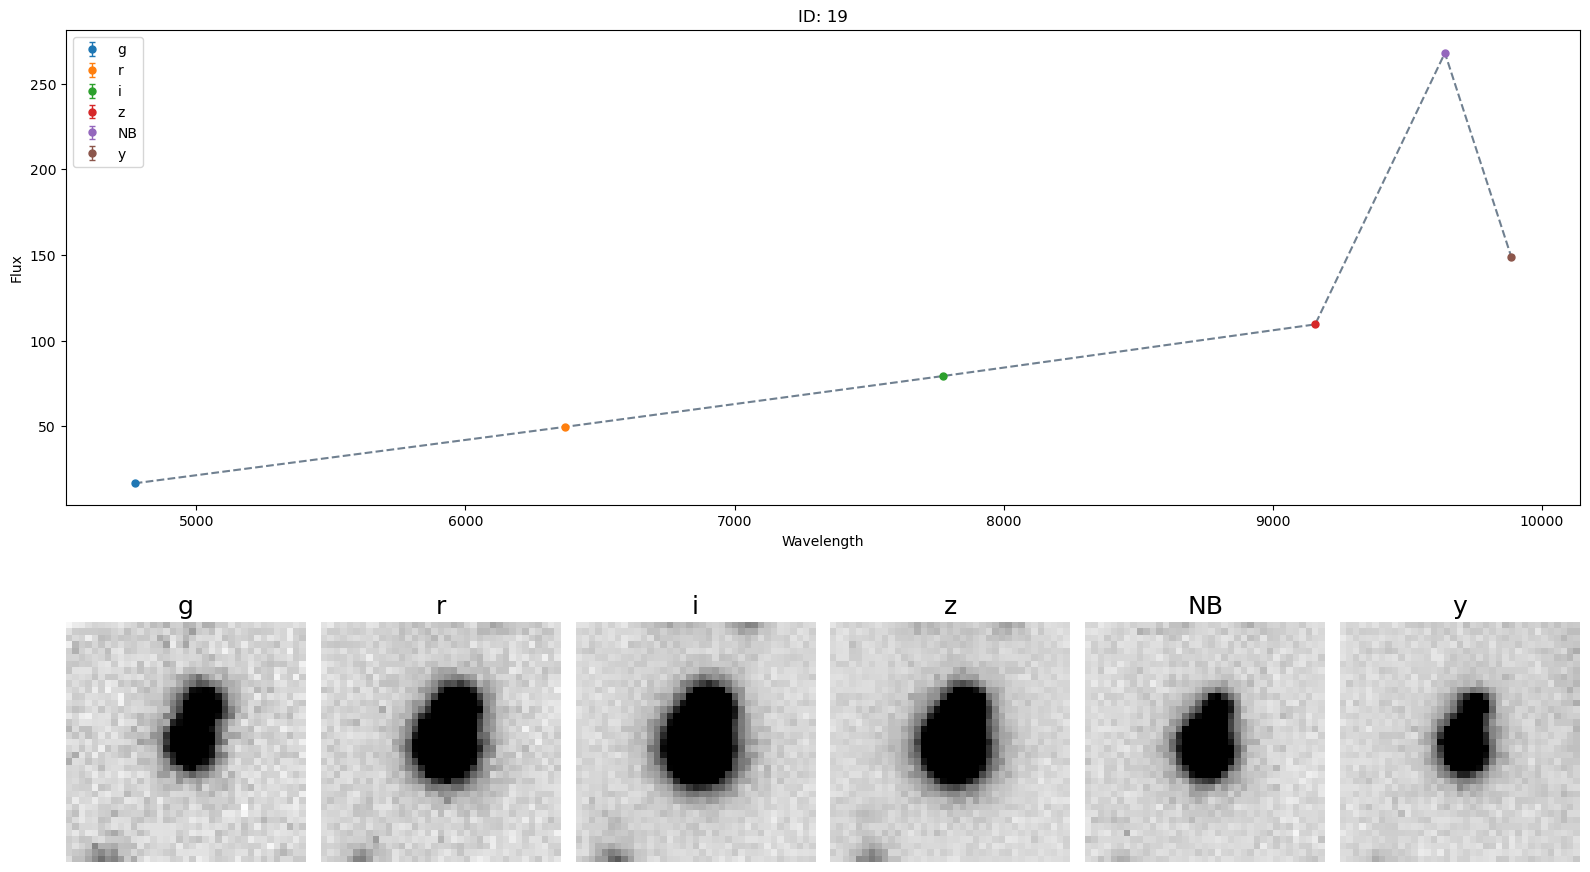

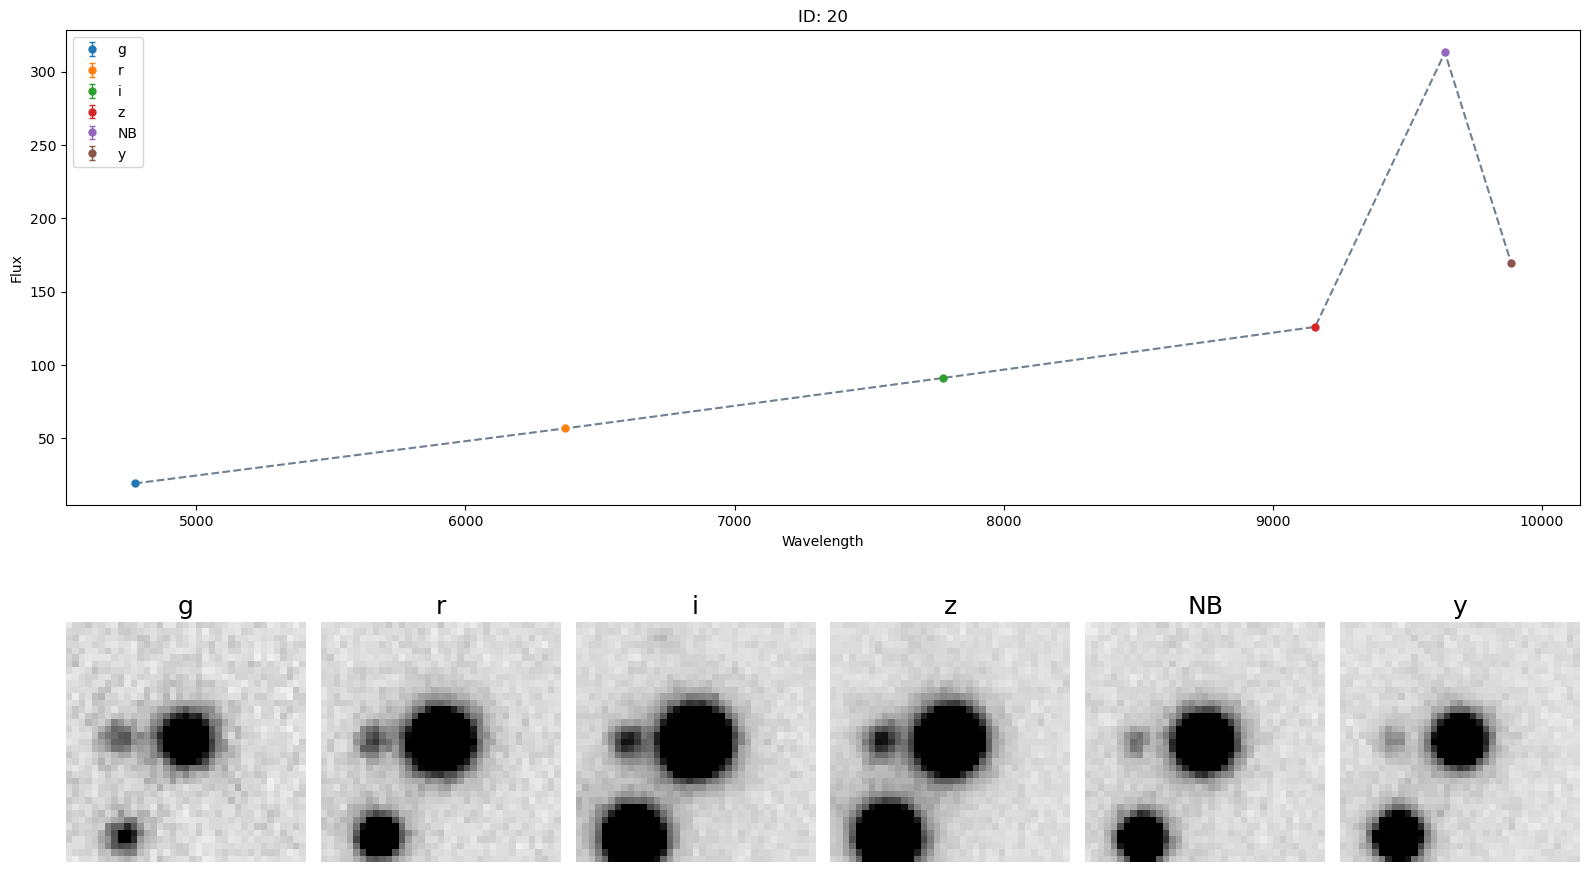

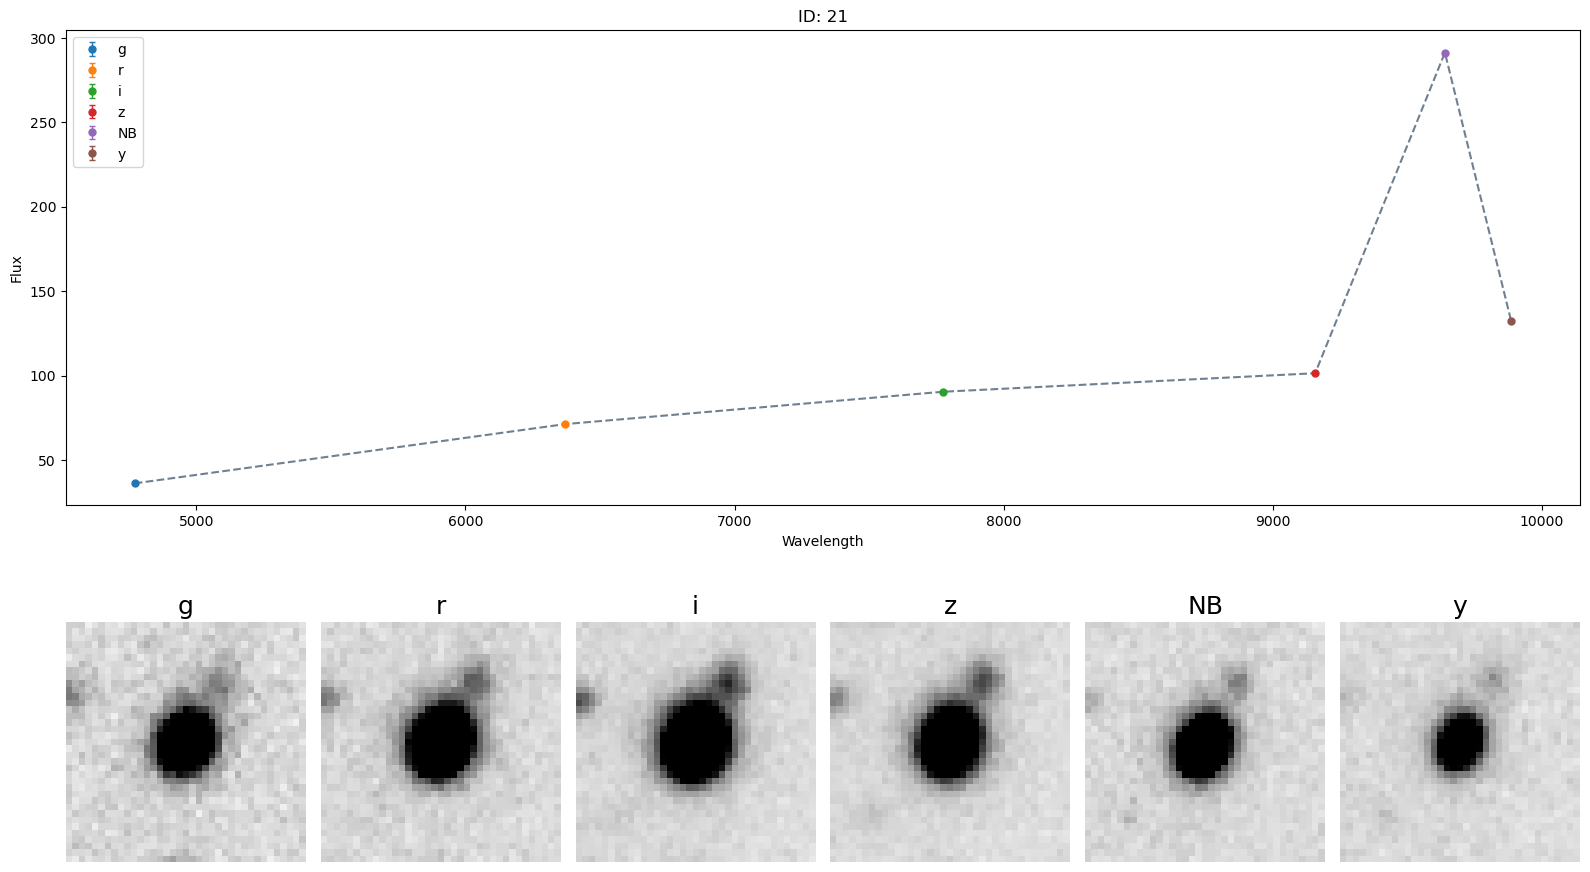

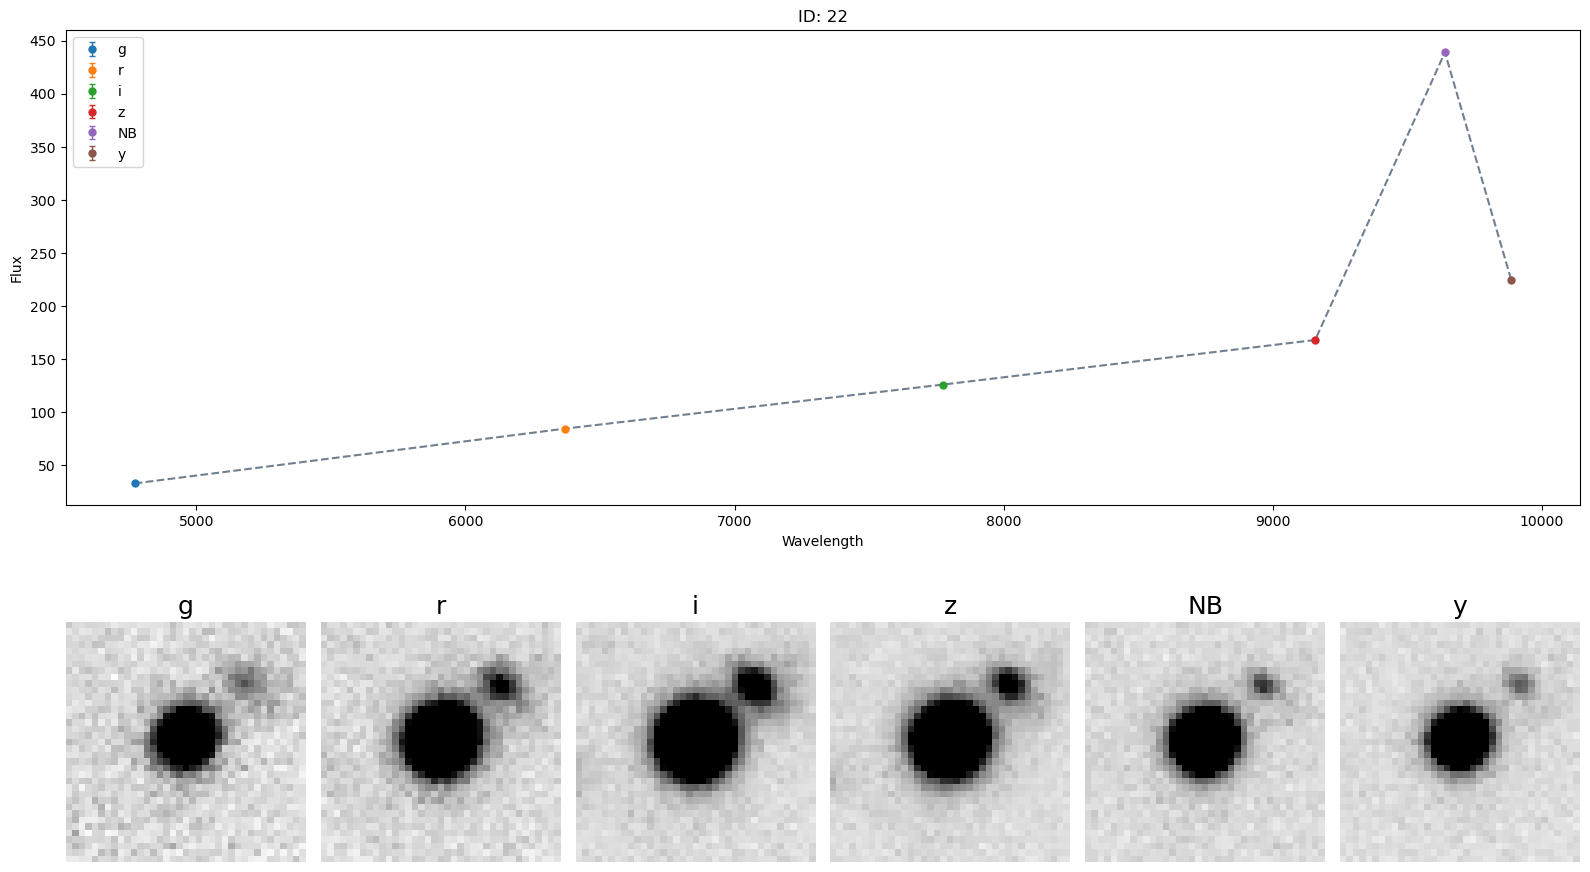

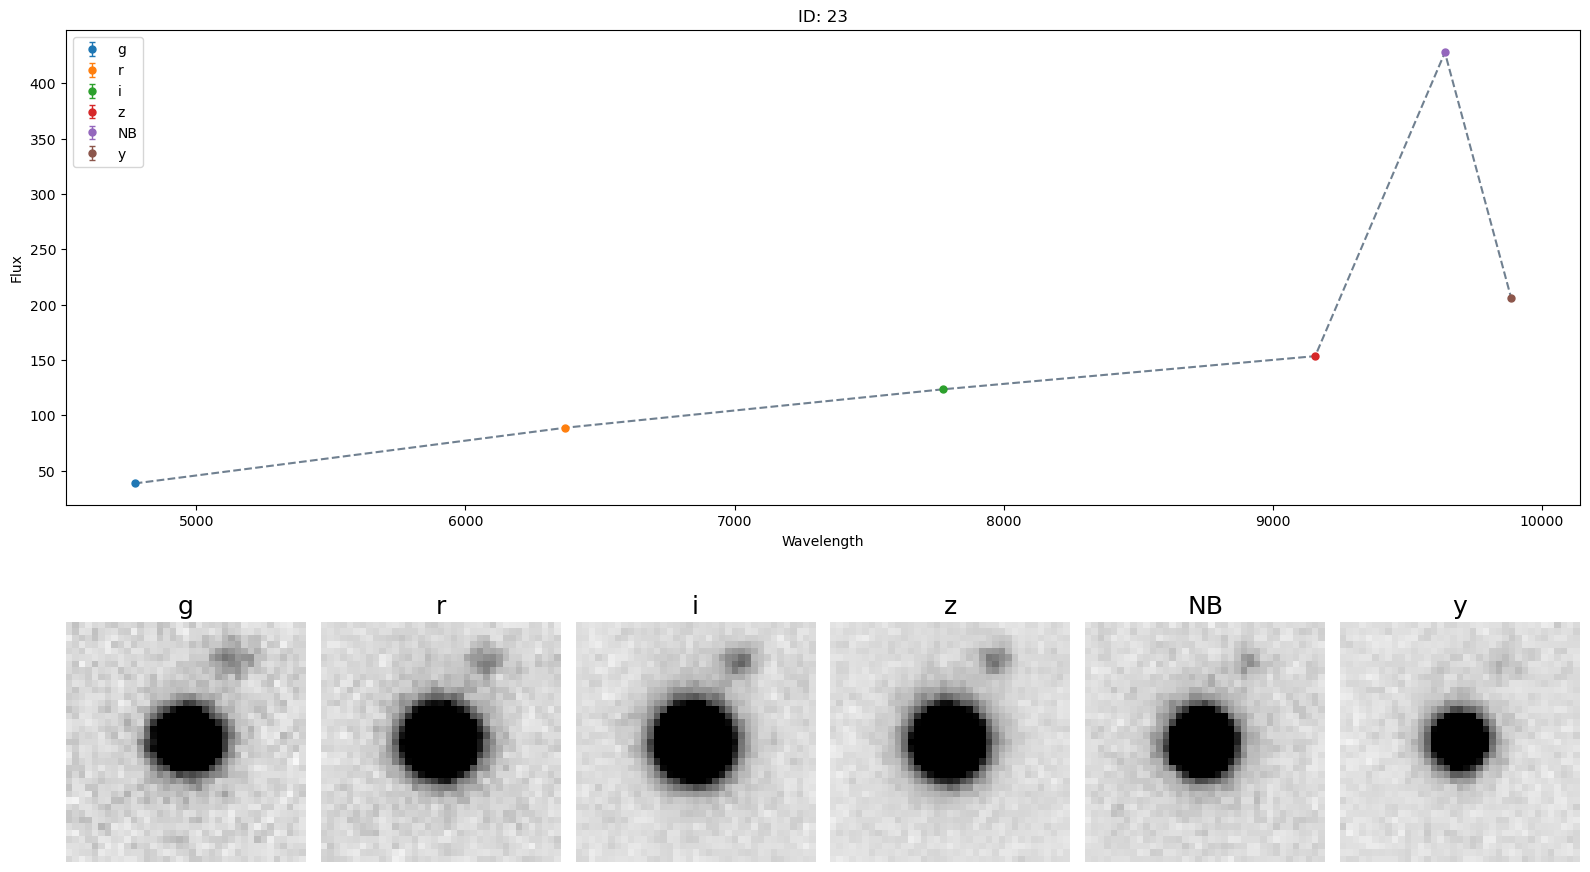

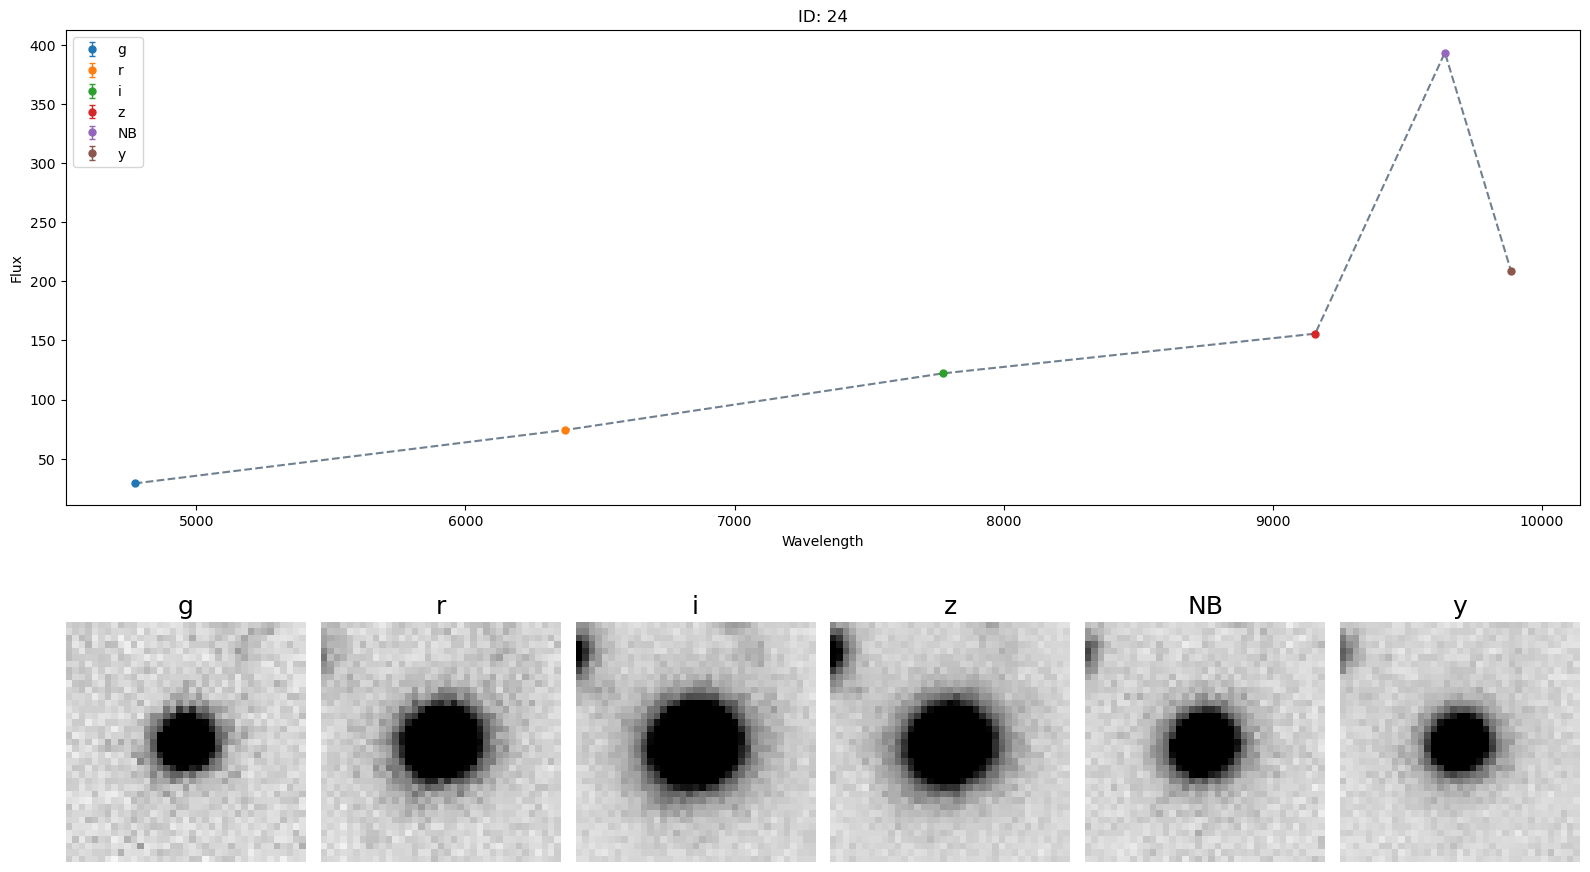

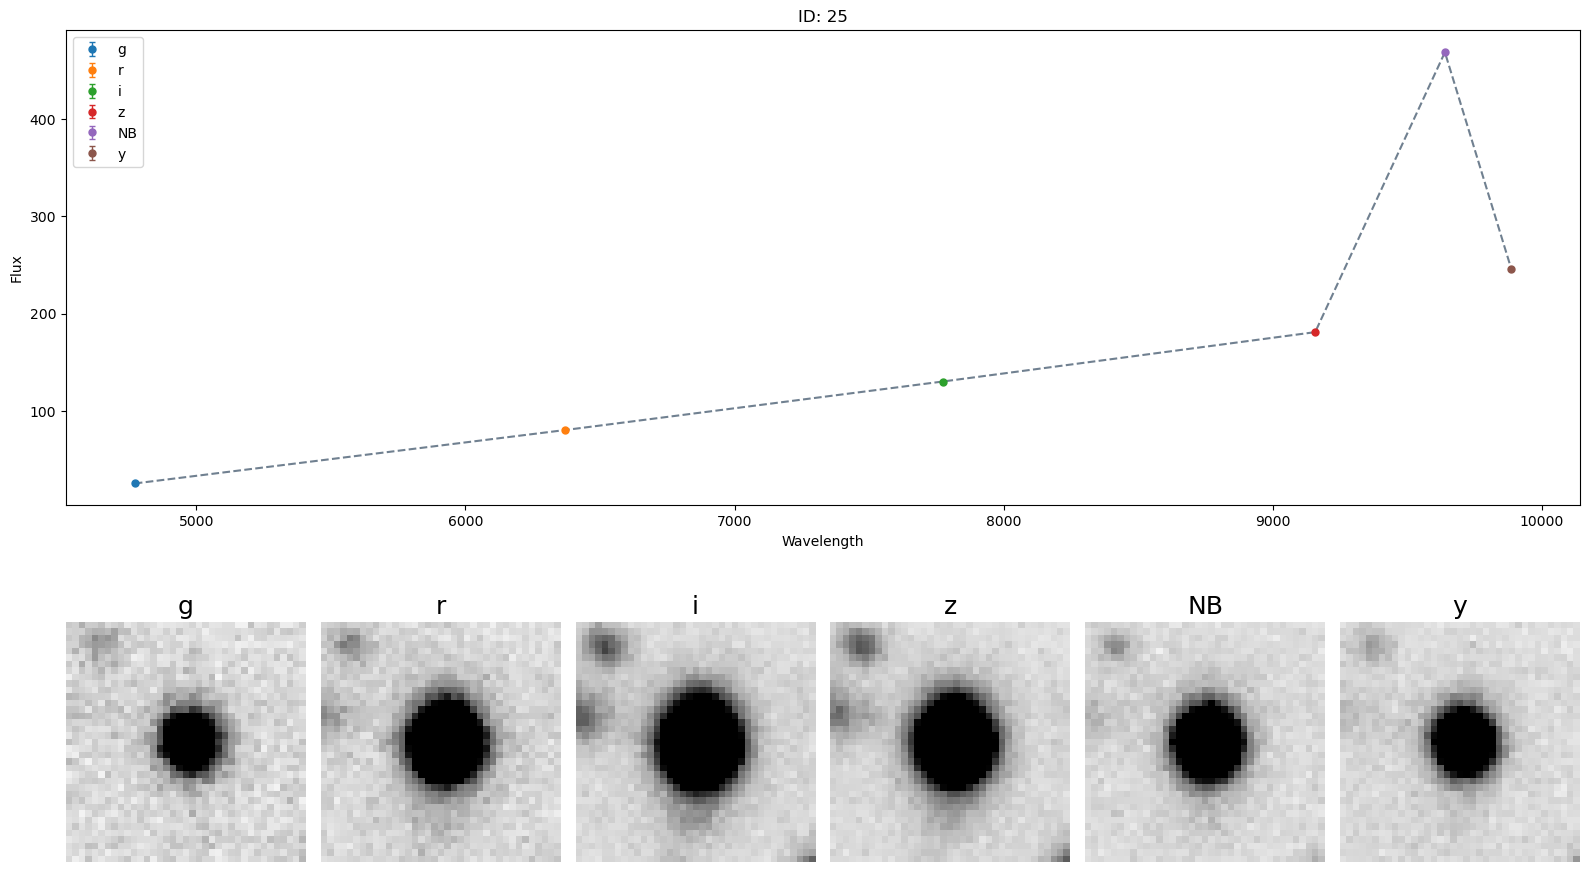

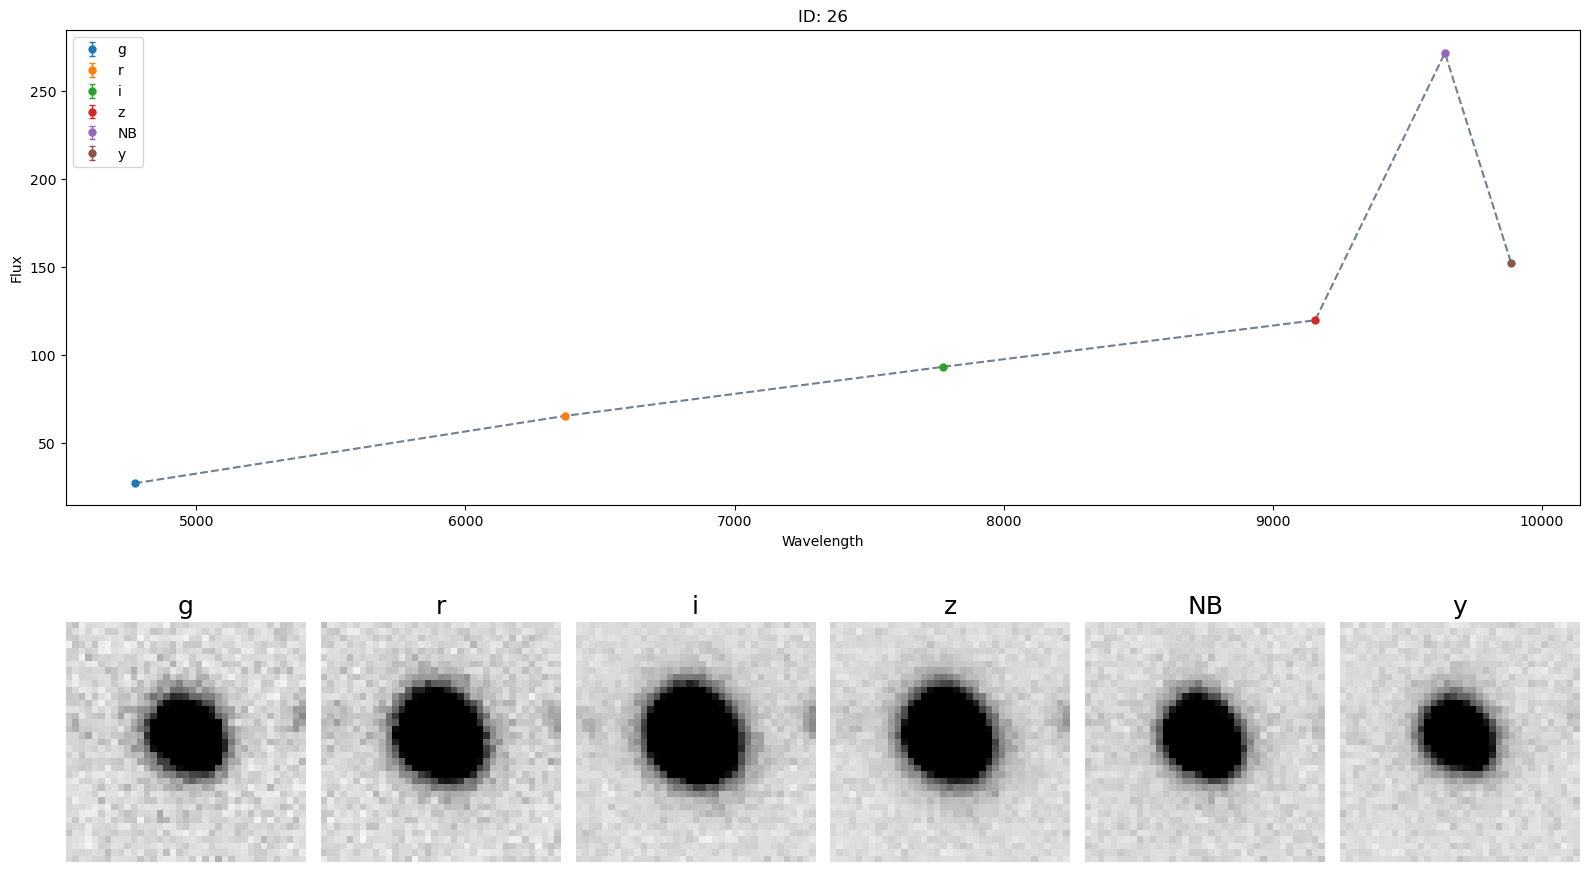

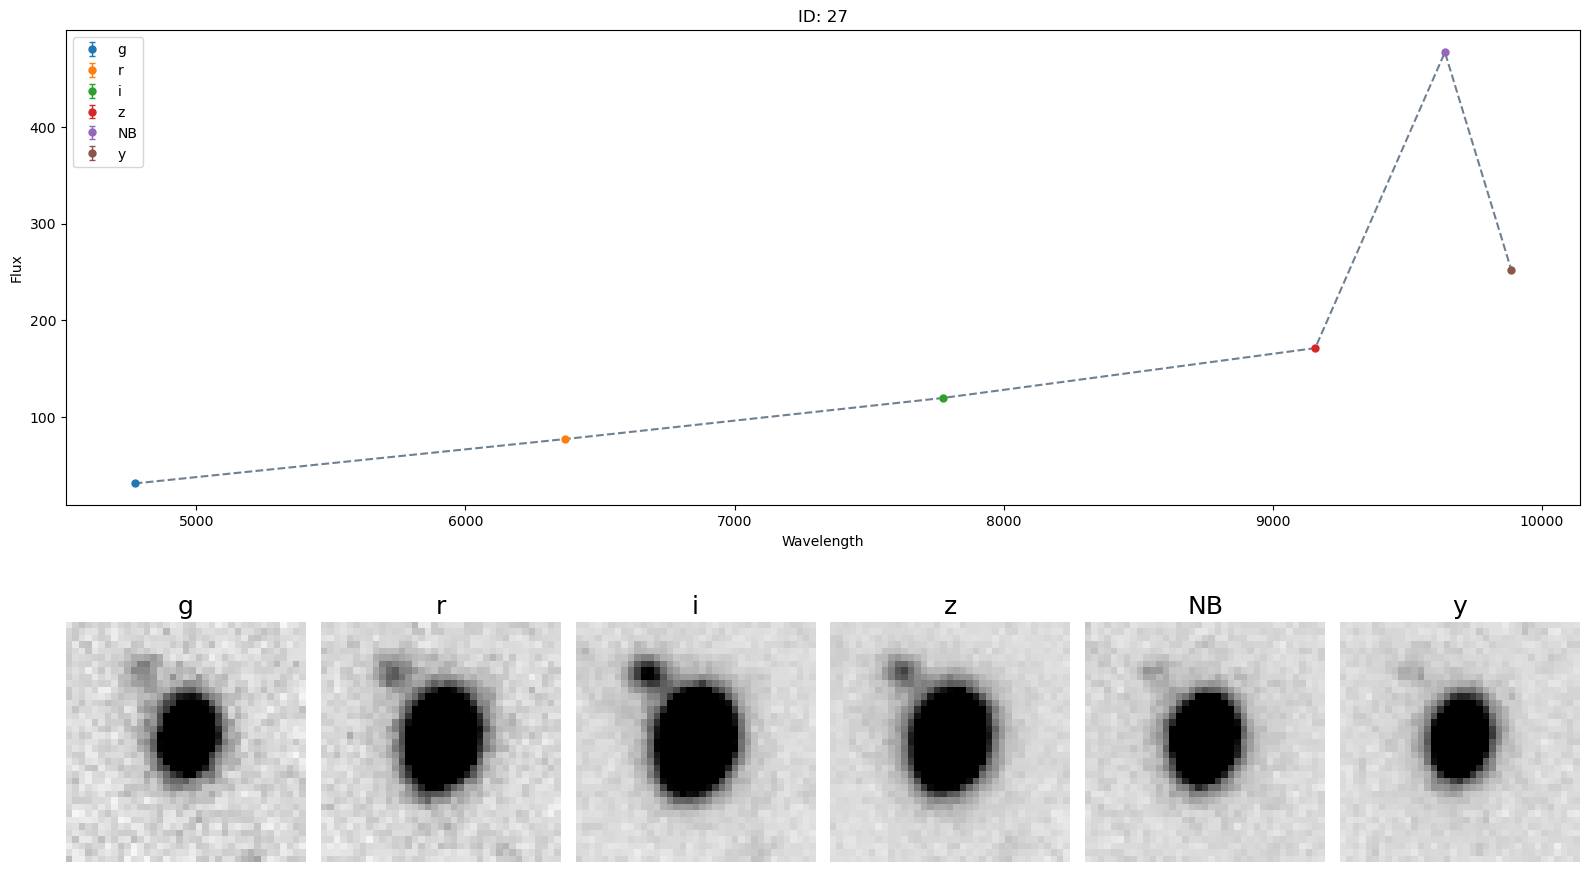

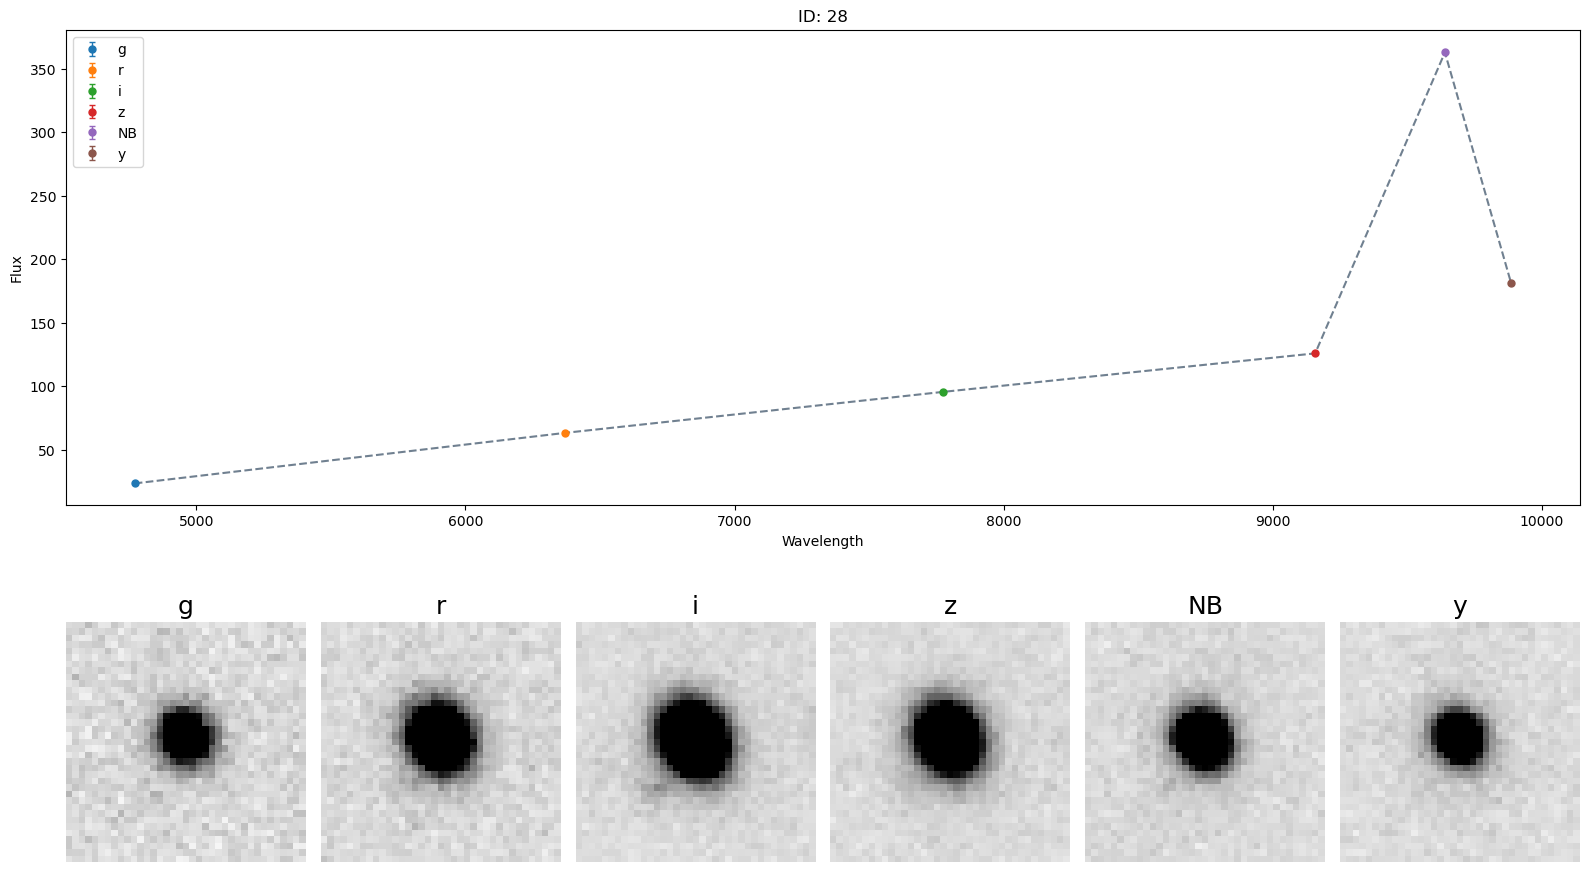

In [17]:
nsf_id = choosef(RA_,DEC_,info)
data_filters = [data_g, data_r, data_i, data_z,data_NB, data_y]
hdr_filters = [hdr_g, hdr_r, hdr_i, hdr_z, hdr_NB,hdr_y]
names_filters = ['g', 'r', 'i', 'z', 'NB', 'y']
flux_filters = [g,r,i,z,NB,y]
flux_errors = [g_err,r_err,i_err,z_err,NB_err,y_err]
NSF_cutm = cuts_mult(nsf_id, data_filters, hdr_filters, names_filters,flux_filters, flux_errors, 10, 'Stamps_ELG')